In [54]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "/content/drive/MyDrive/DS1final/code"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DS1final/code


In [55]:
import pandas as pd
import numpy as np

! pip install sweetviz 
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# load and merge data

load all datas

In [56]:
# !ls "../Dataset/NCES"

In [57]:
path = "../Dataset/"

## NCES data

financial columns we need:
* pp_total_raw_DC: per-pupil total expenditure total
* pp_site_raw_DC: per-pupil site expenditure total
* pp_centshare_raw_DC: per-pupil site-share of central expenditure total
* schoolstloc_raw_DC: total school state and local expenditures (not per-pupil)
* schtype_raw_DC: school type
* ward_raw_DC: state assigned identification ward number

In [58]:
def nces_process(data):

    # get columns we need
    cols = data.columns
    finan_cols =  ['pp_total_raw_DC', 'pp_site_raw_DC', 'pp_centshare_raw_DC', 'schoolstloc_raw_DC', \
                    'schtype_raw_DC', 'ward_raw_DC']
    other_cols = ['level', 'enroll_raw_DC']
    if 'nces_freelunch' in data:
        other_cols += ['nces_freelunch', 'nces_reducedlunch']
        
    cols_need = list(cols[0:5]) + finan_cols + other_cols
    data = data[cols_need]

    #delete cols have constant value except state and year
    drop_cols = list(data.columns[data.nunique() <= 1])[2:] 
    data = data.drop(drop_cols, axis=1)

    #transfer col to some numeric data and fill null w/ empty value
    num_cols = ['enroll_raw_DC', 'ward_raw_DC', 'schoolstloc_raw_DC'] + \
                [col for col in data if col.startswith('pp')]
    for col in num_cols:
        data[col] = pd.to_numeric( data[col], errors='coerce')
    

    return data

                                             |          | [  0%]   00:00 -> (? left)


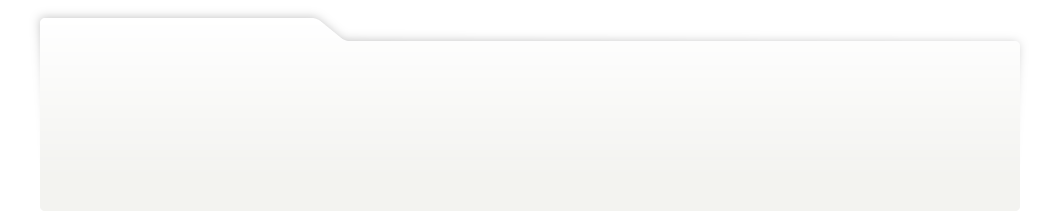
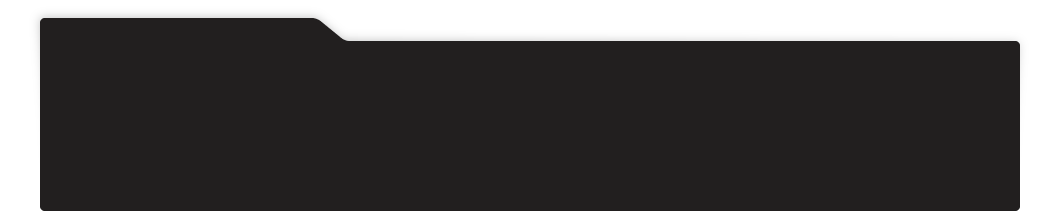
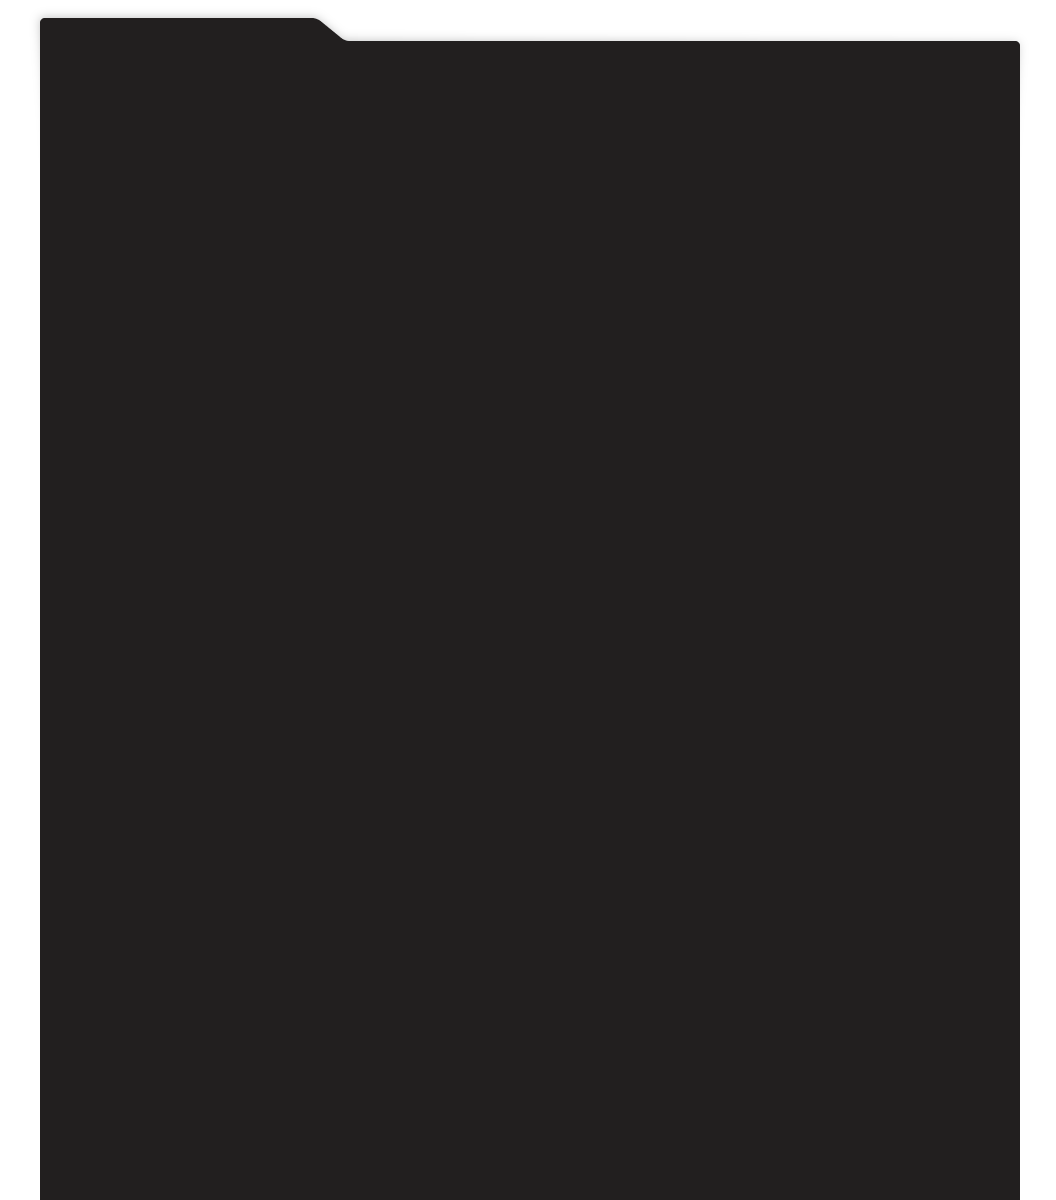
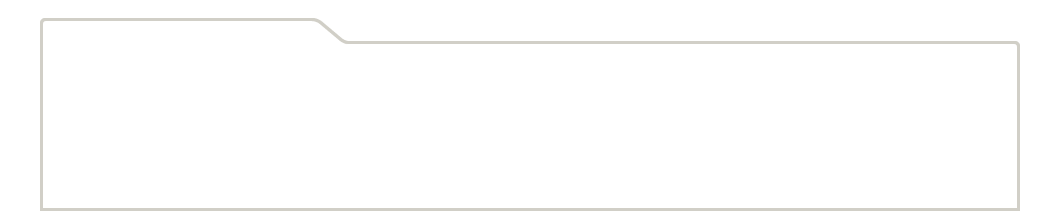
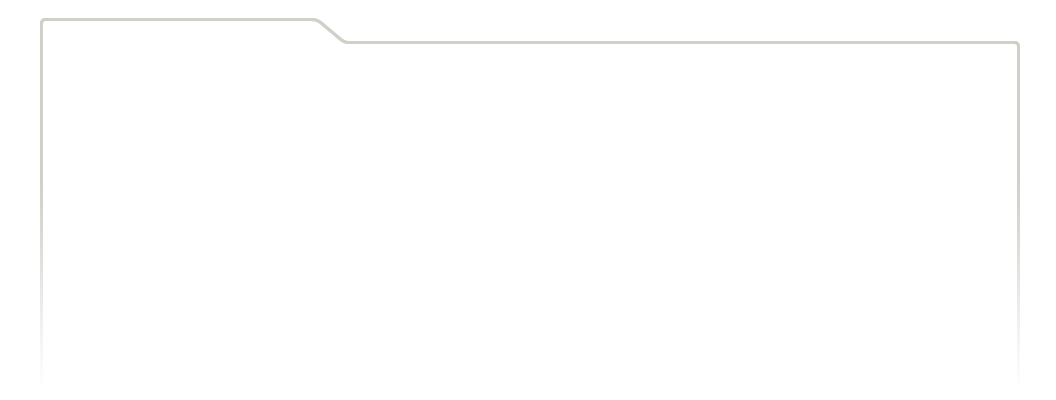
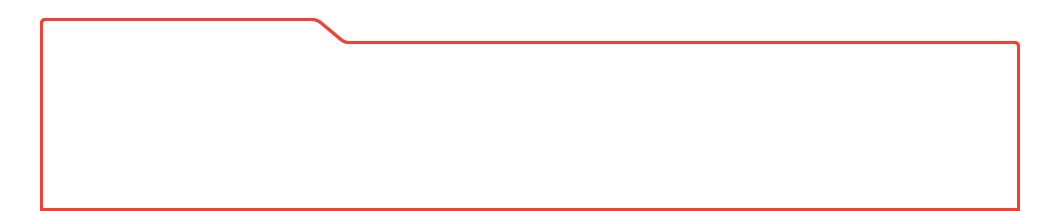
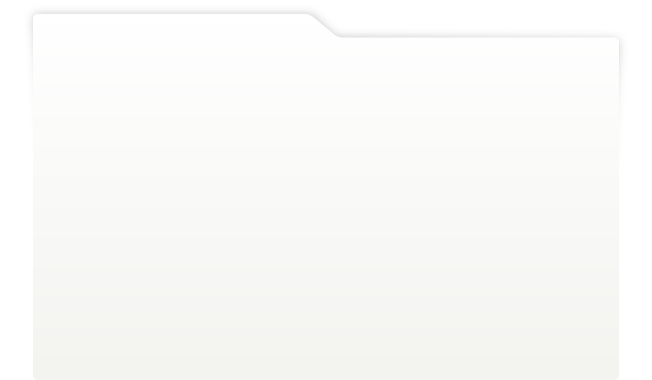
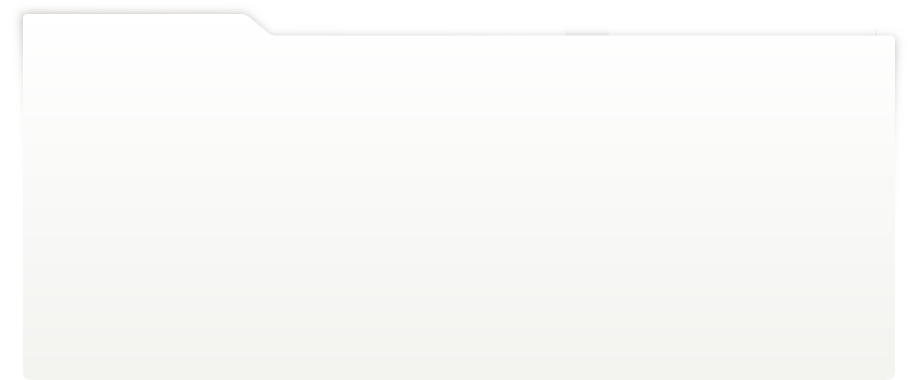
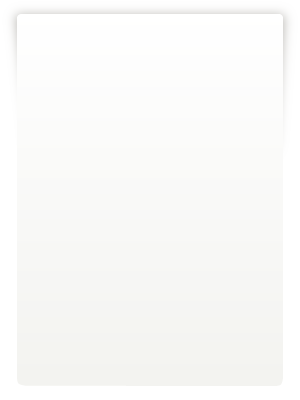
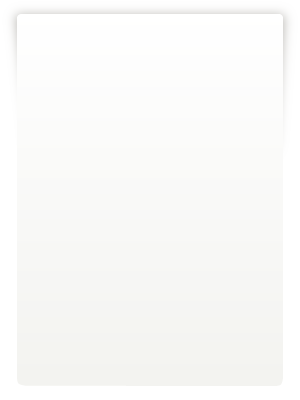
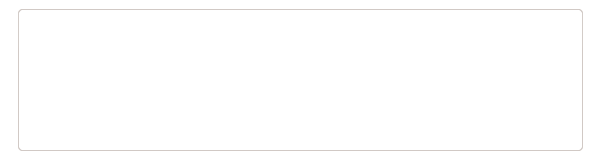
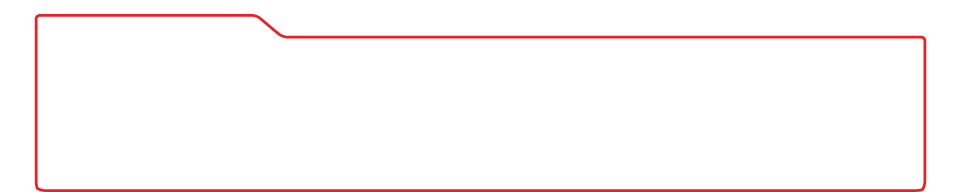
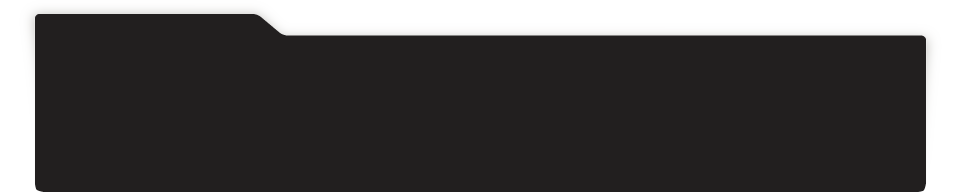
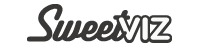
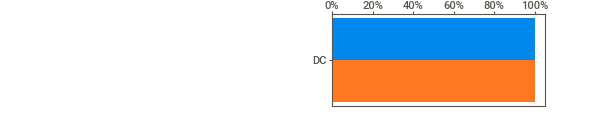
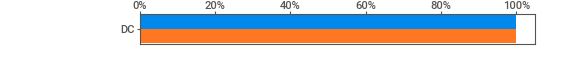
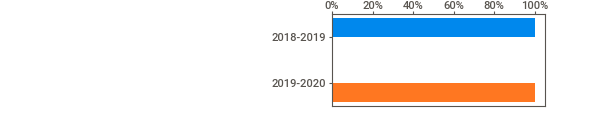
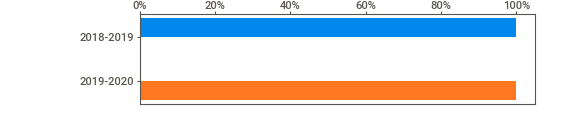
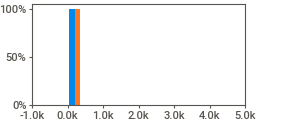
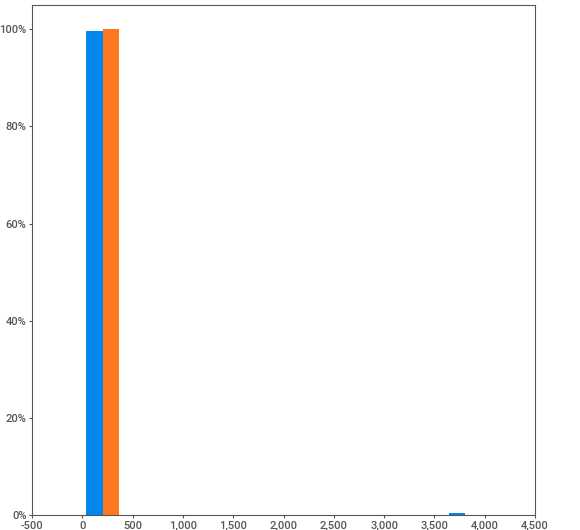
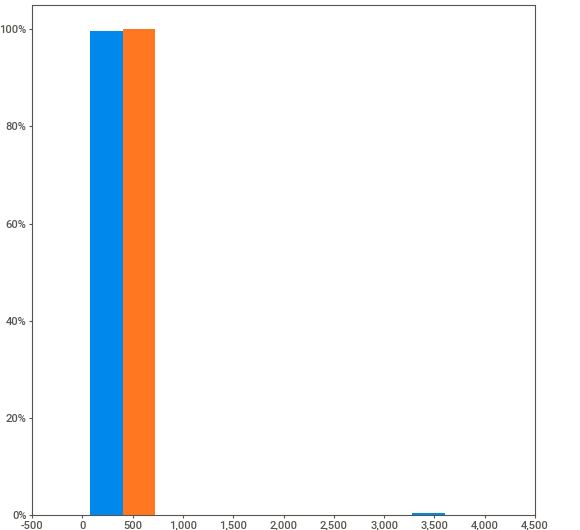
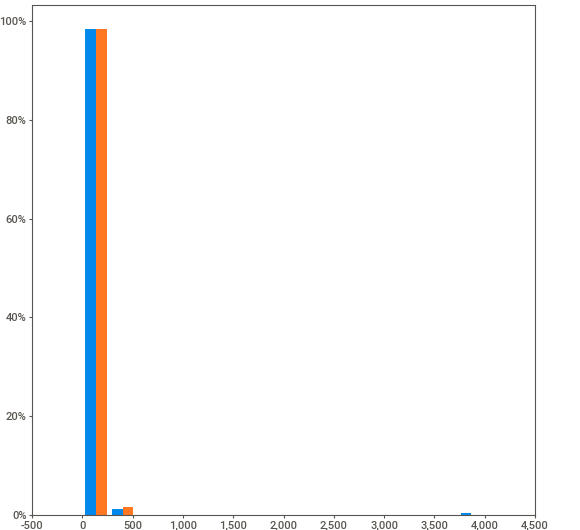
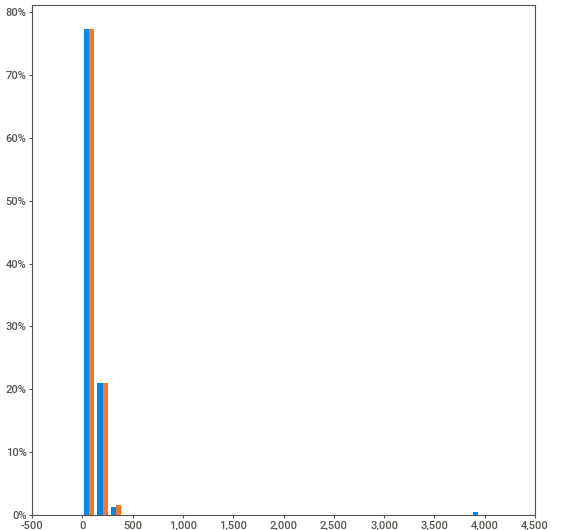
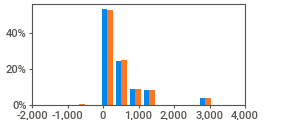
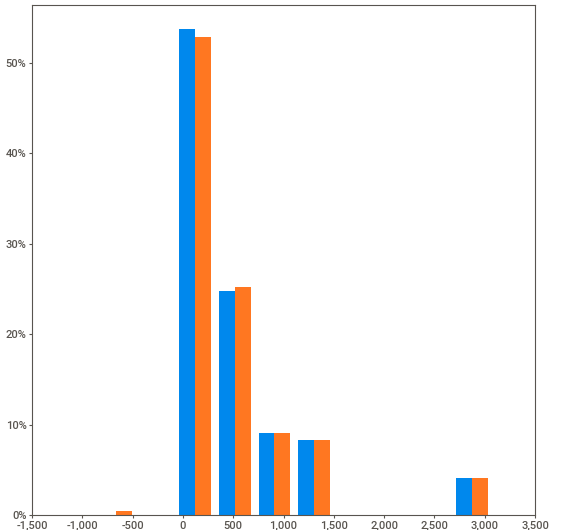
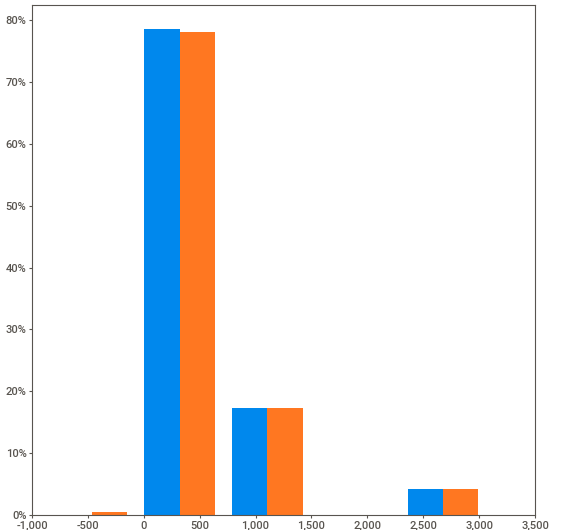
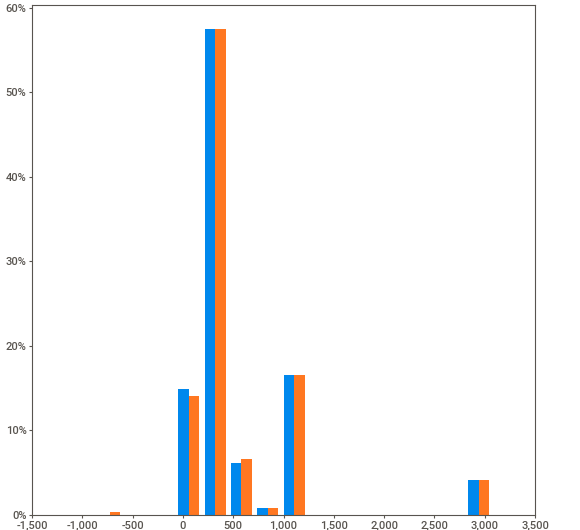
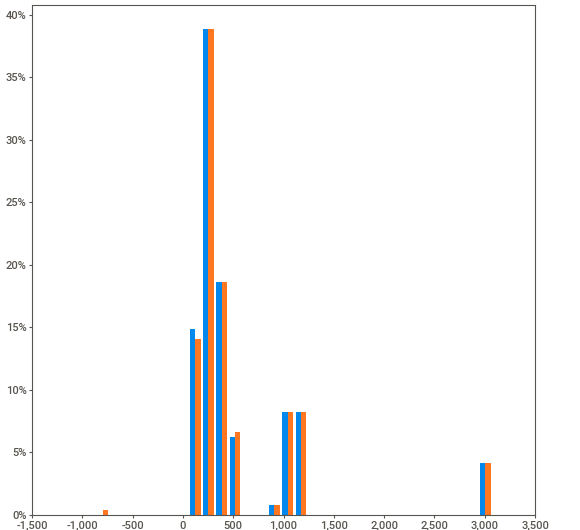
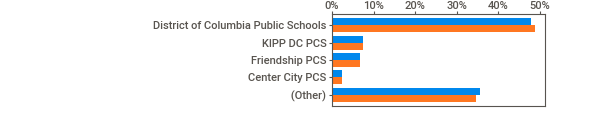
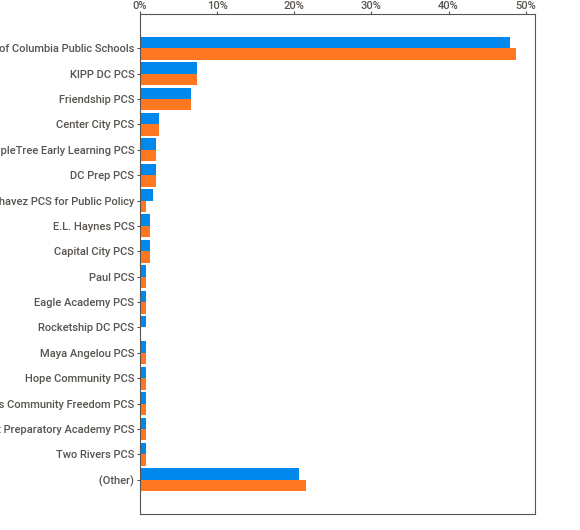
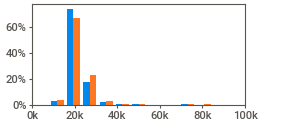
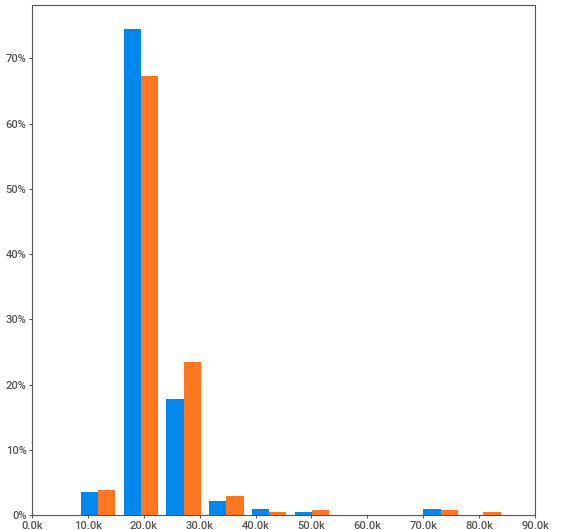
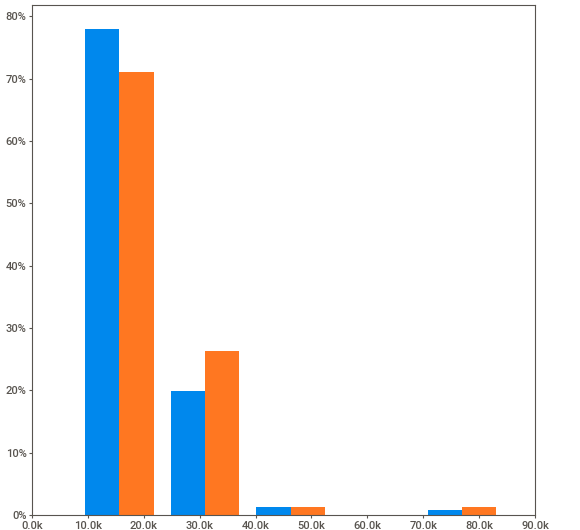
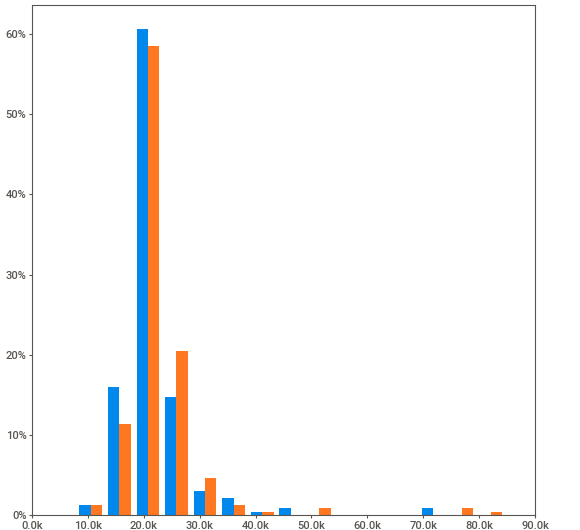
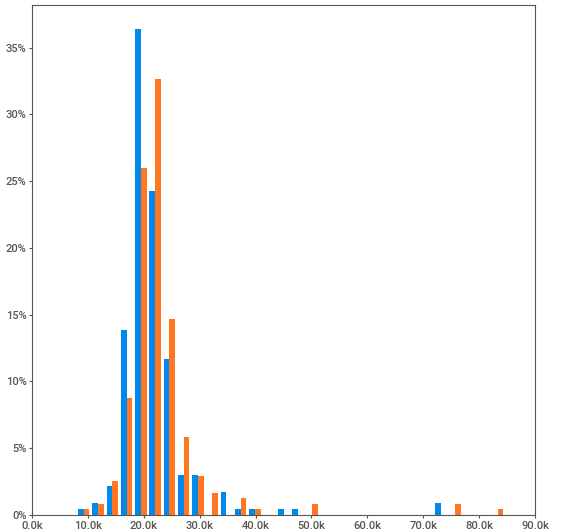
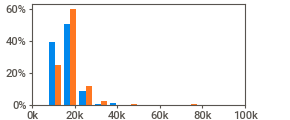
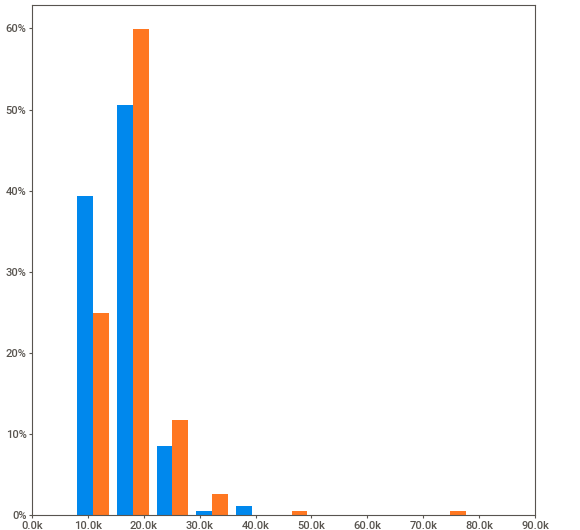
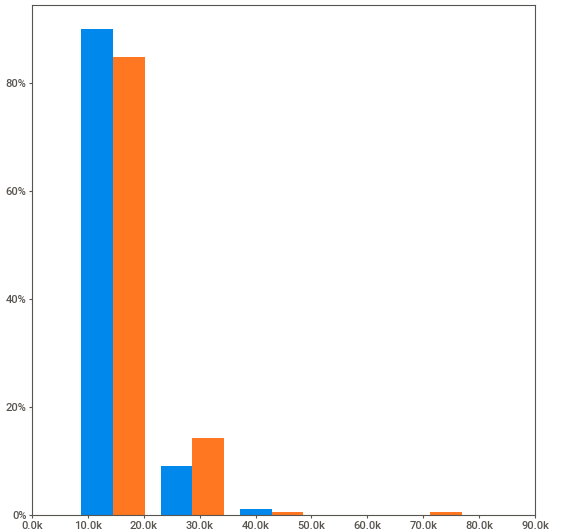
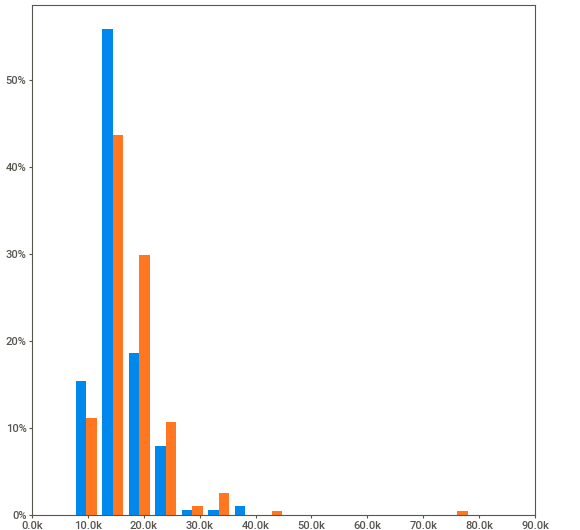
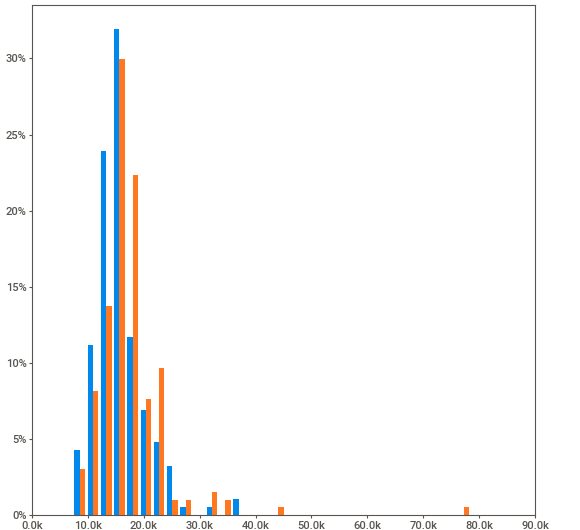
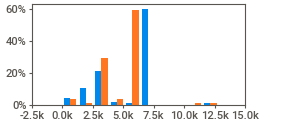
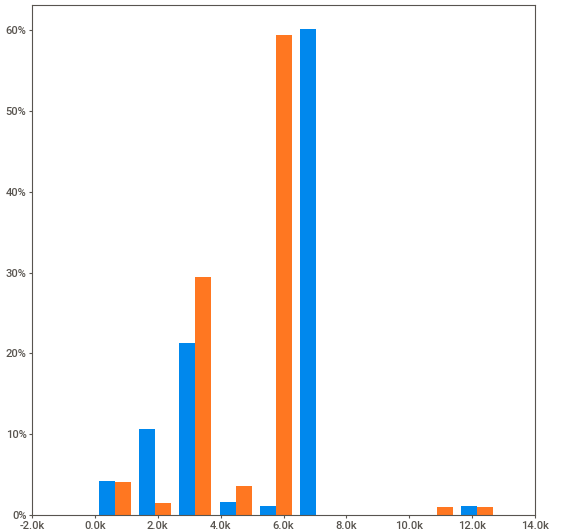
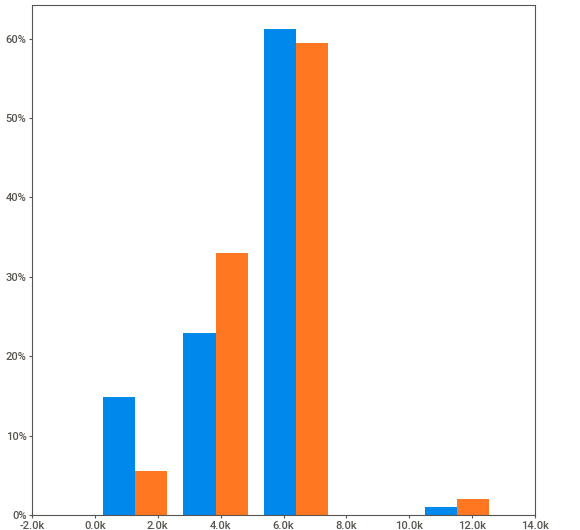
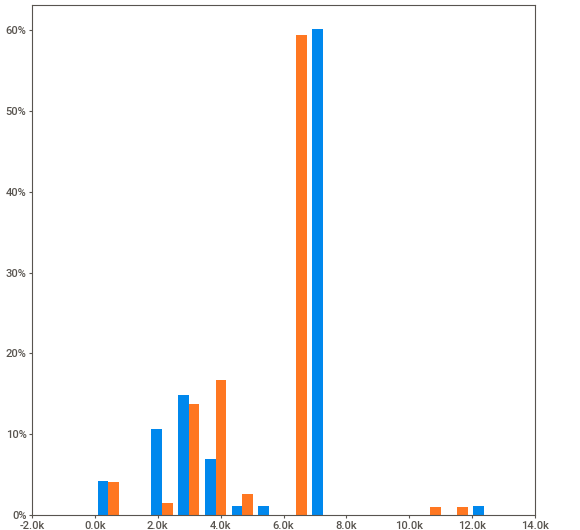
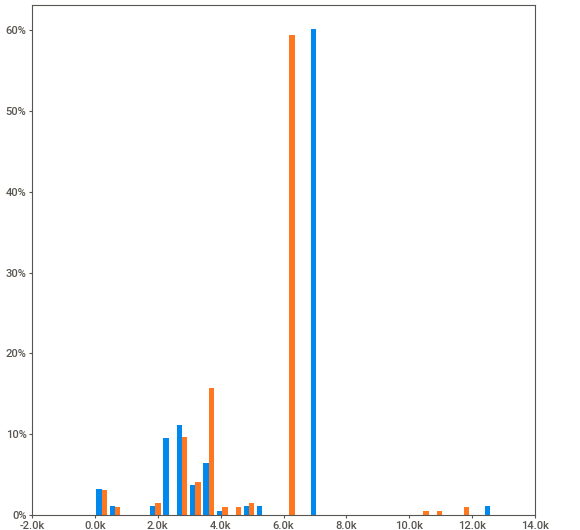
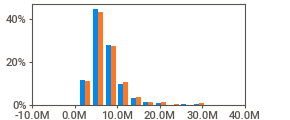
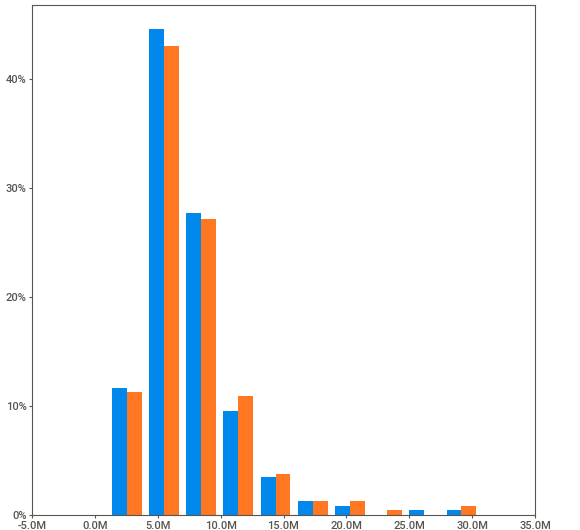
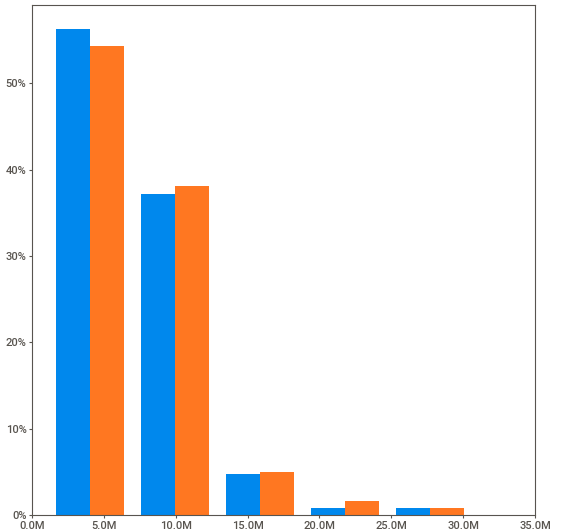
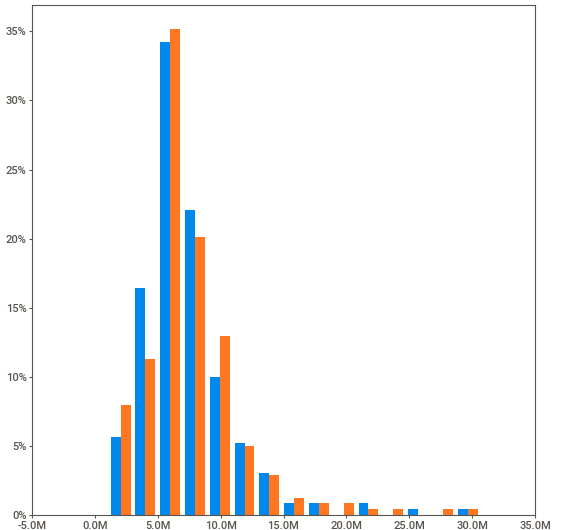
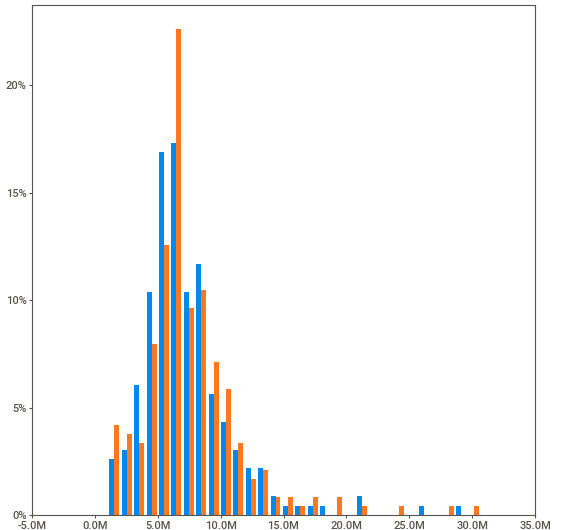
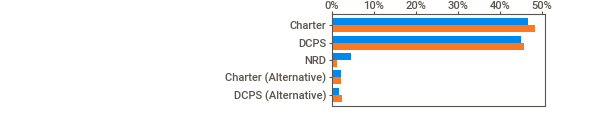
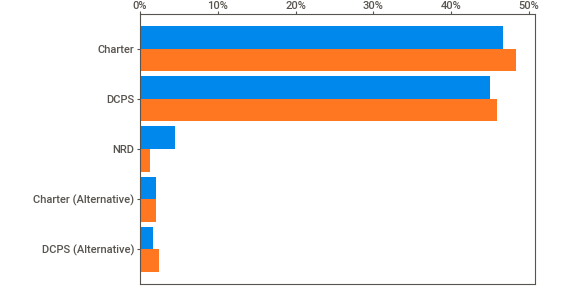
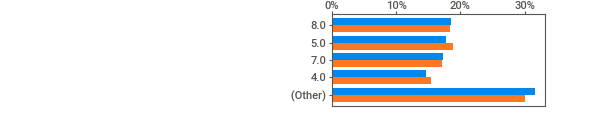
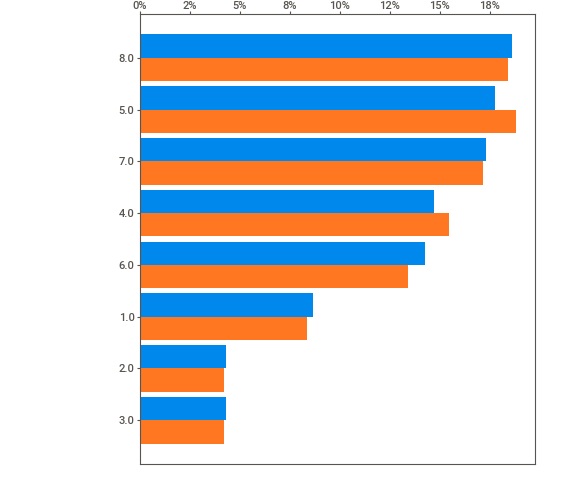
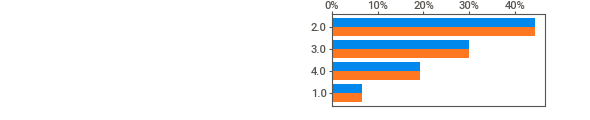
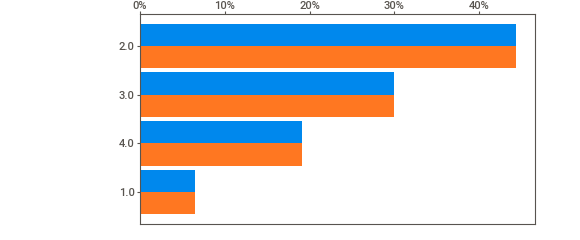
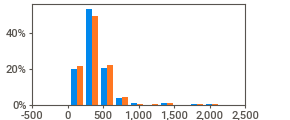
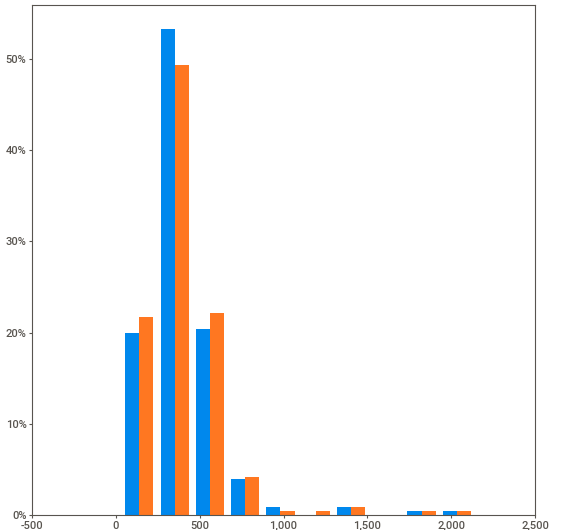
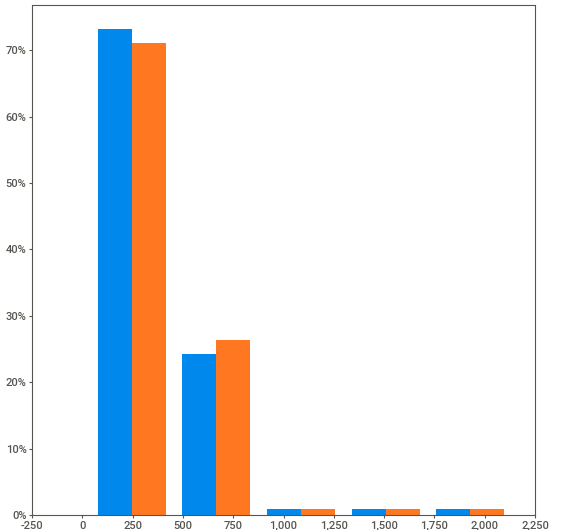
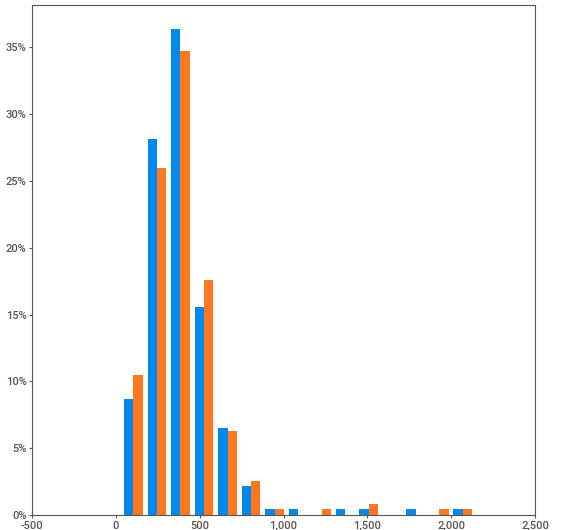
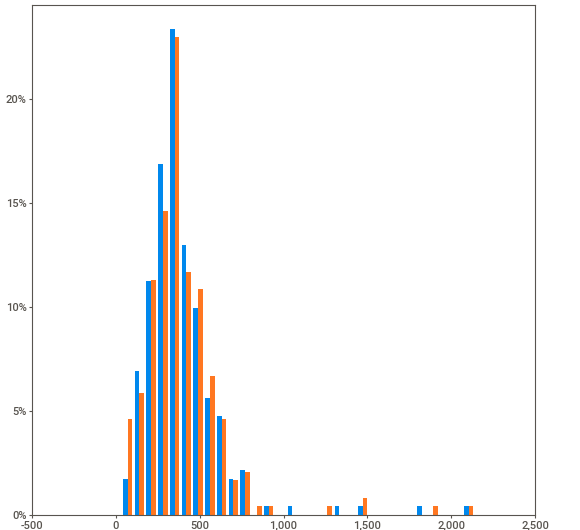
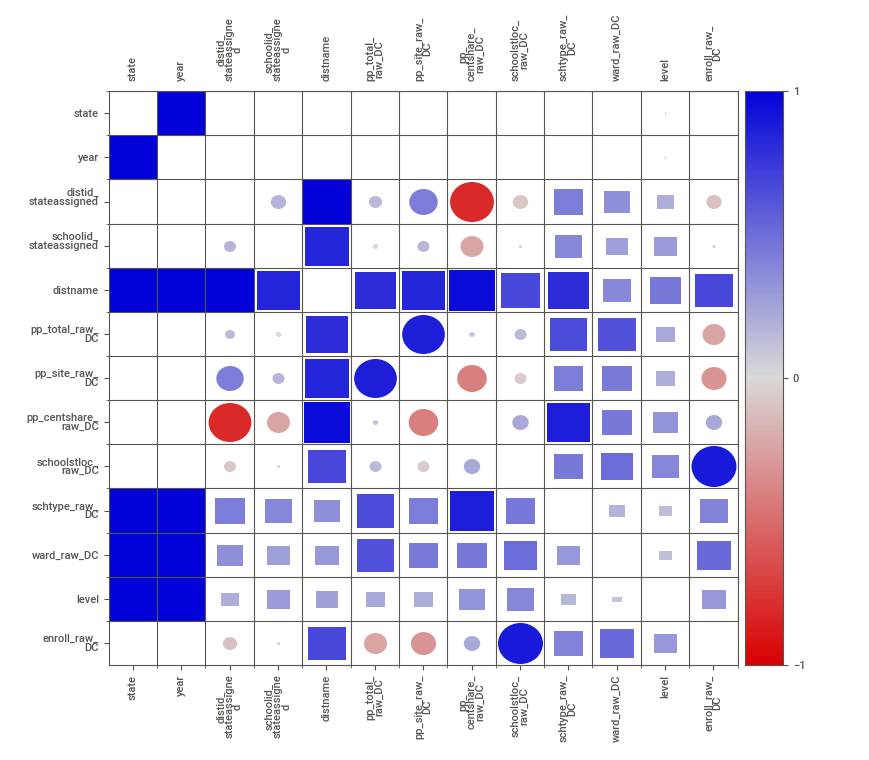
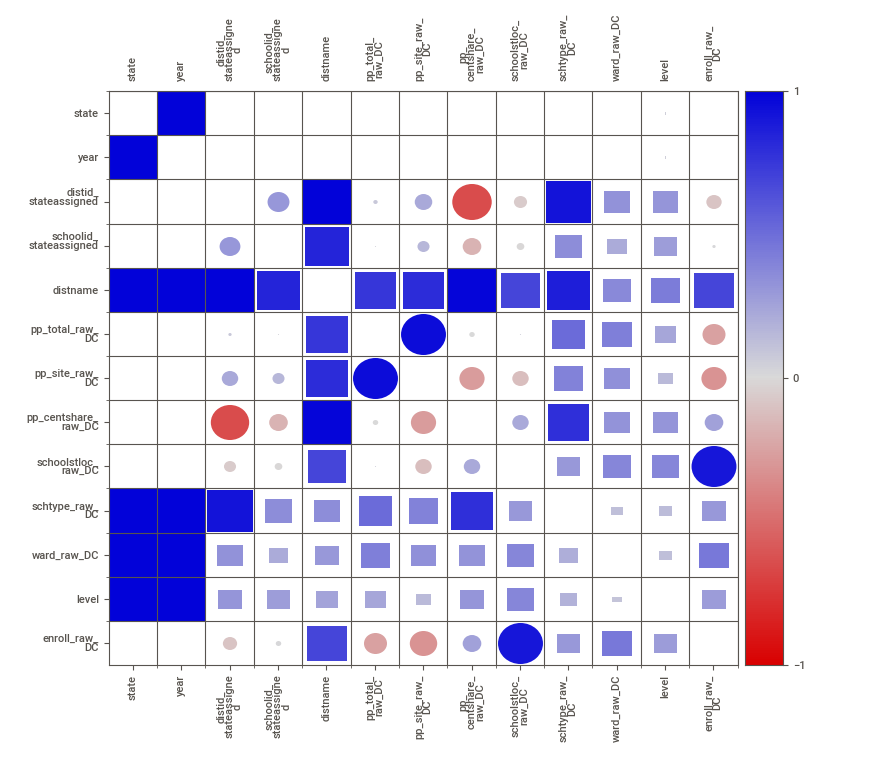

In [59]:
nces_1819 = pd.read_excel("../Dataset/NCES/DC_1819.xlsx")
nces_1819 = nces_process(nces_1819)
nces_1920=pd.read_excel("../Dataset/NCES/DC_1920.xlsx")
nces_1920 = nces_process(nces_1920)

nces_cmp = sv.compare(nces_1819, nces_1920)
nces_cmp.show_notebook()

In [60]:
nces = pd.concat([nces_1819, nces_1920])
nces.shape

(484, 13)

## STAR

In [61]:
!ls "../Dataset/OSSEDC/2019"


'2019 DC School Report Card Aggregate Public Data_.xlsx'
'2019 Report Card_School Finance Public File.xlsx'


In [62]:
star_19 = pd.read_excel("../Dataset/OSSEDC/2019/2019 DC School Report Card Aggregate Public Data_.xlsx", sheet_name='STAR Scores')
star_18 = pd.read_csv('../Dataset/OSSEDC/2018/2018_School_STAR_Scores.csv')  
print(star_19.info())
print(star_18.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA Code     206 non-null    int64  
 1   LEA Name     206 non-null    object 
 2   School Code  206 non-null    int64  
 3   School Name  206 non-null    object 
 4   School Type  206 non-null    object 
 5   Ward         206 non-null    int64  
 6   STAR Score   206 non-null    float64
 7   STAR Rating  206 non-null    int64  
 8   School Year  206 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 14.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA_Code     203 non-null    int64  
 1   LEA_Name     203 non-null    object 
 2   School_Code  203 non-null    int64  
 3   School_Name  203 non-null    object 
 4   Schoo

In [63]:
star_19.columns = star_19.columns.str.replace(" ", "_")
star_19 = star_19.drop(['School_Year'], axis=1)
star_18 = star_18.drop(['ObjectId'], axis=1)
print(star_19.info())
print(star_18.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA_Code     206 non-null    int64  
 1   LEA_Name     206 non-null    object 
 2   School_Code  206 non-null    int64  
 3   School_Name  206 non-null    object 
 4   School_Type  206 non-null    object 
 5   Ward         206 non-null    int64  
 6   STAR_Score   206 non-null    float64
 7   STAR_Rating  206 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 13.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEA_Code     203 non-null    int64  
 1   LEA_Name     203 non-null    object 
 2   School_Code  203 non-null    int64  
 3   School_Name  203 non-null    object 
 4   School_Type  203 non-null    object 
 5   Ward 

                                             |          | [  0%]   00:00 -> (? left)


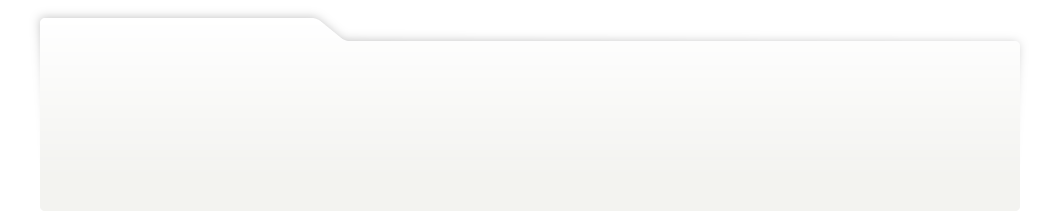
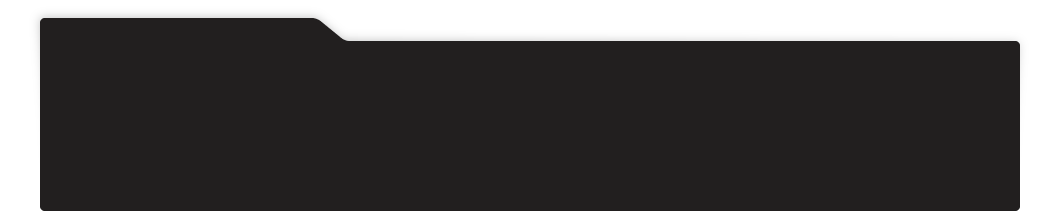
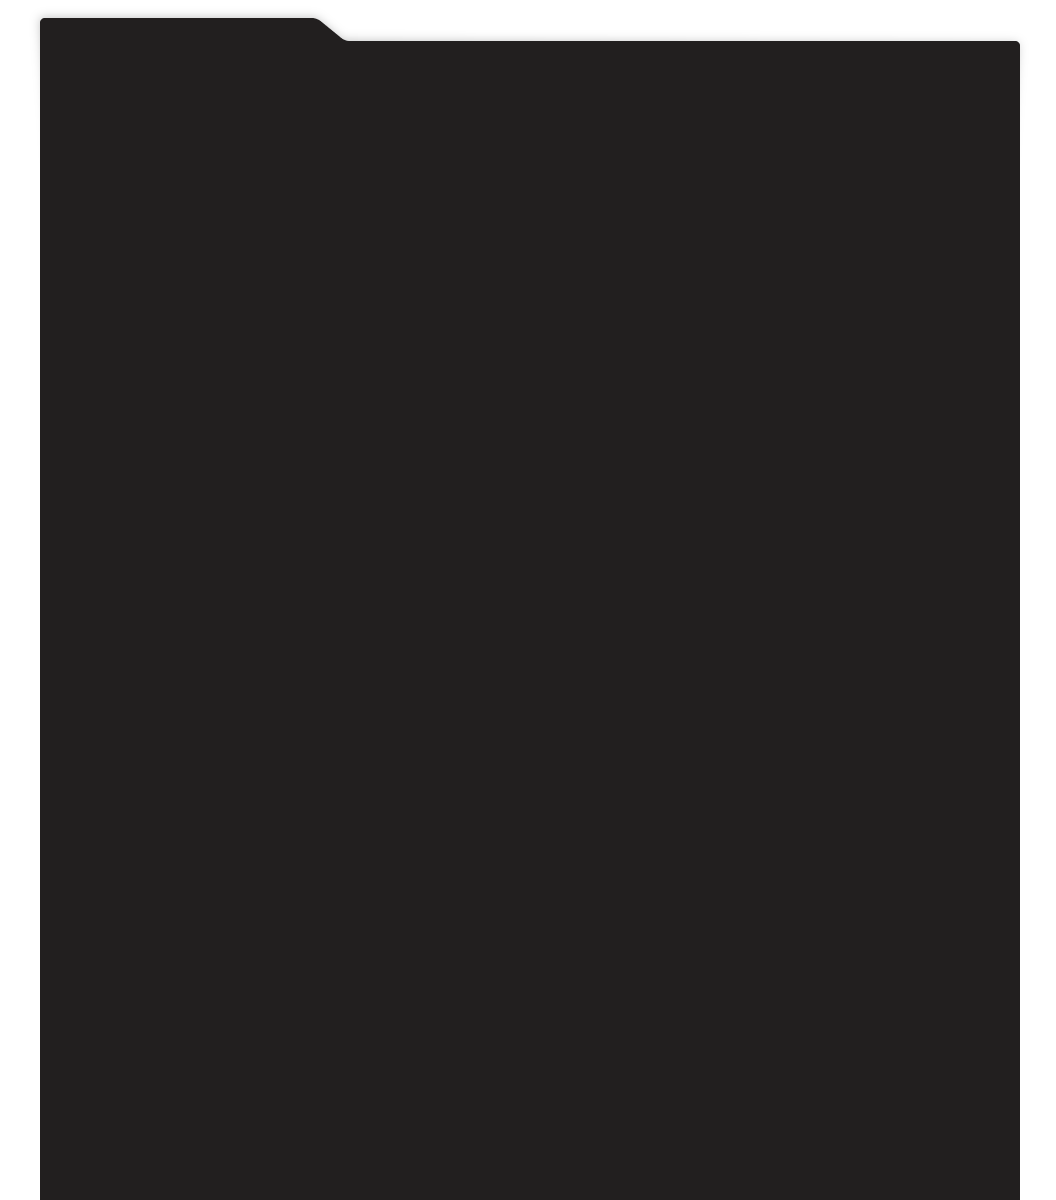
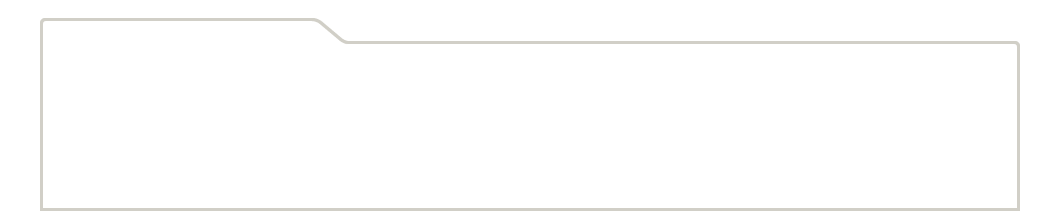
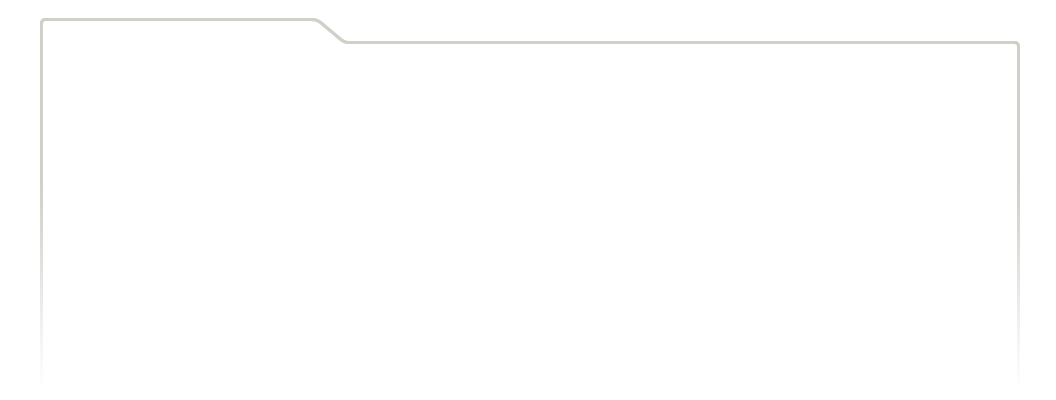
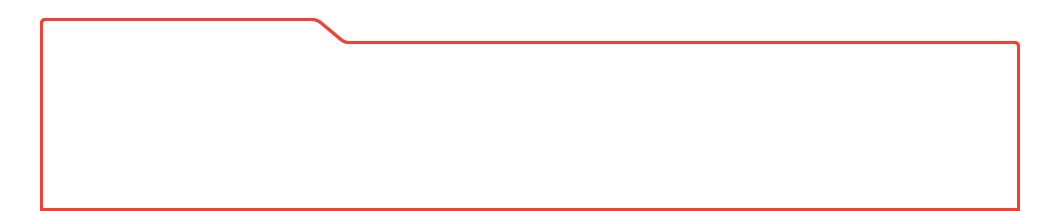
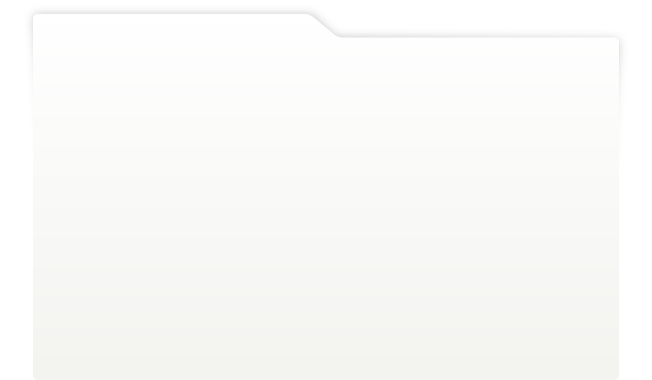
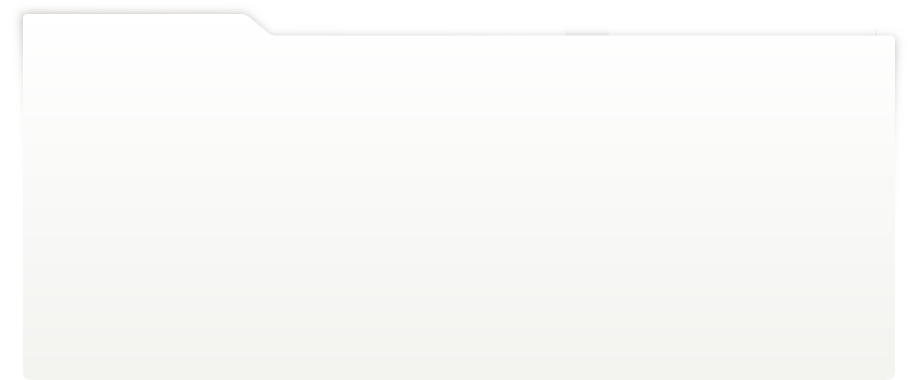
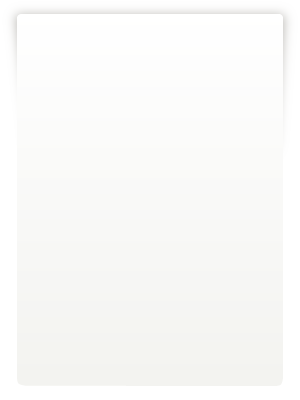
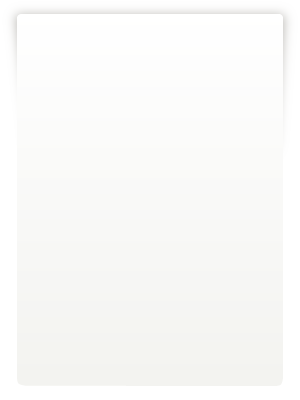
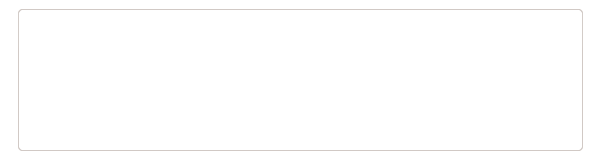
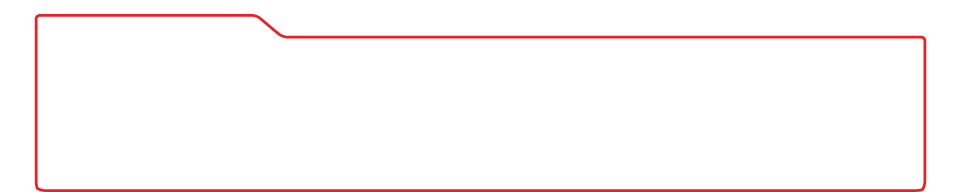
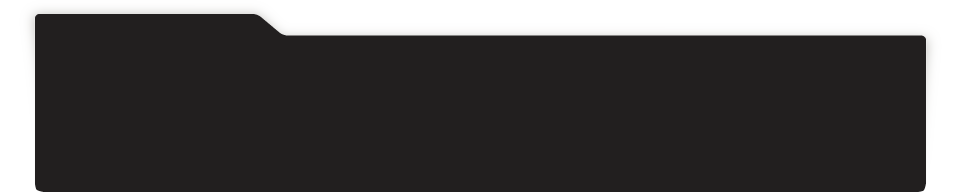
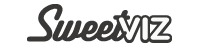
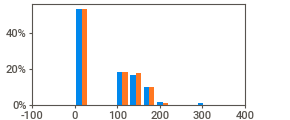
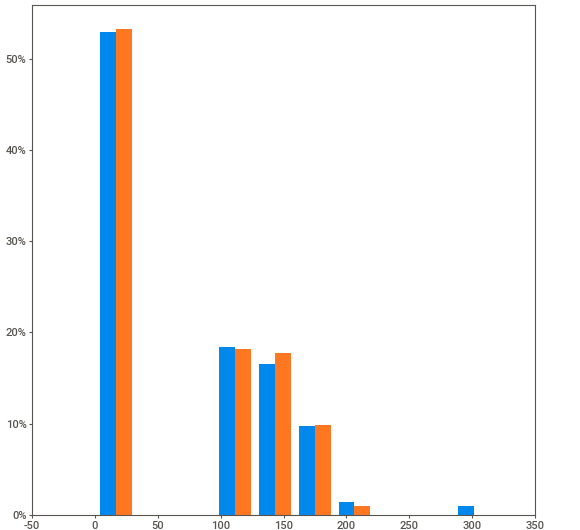
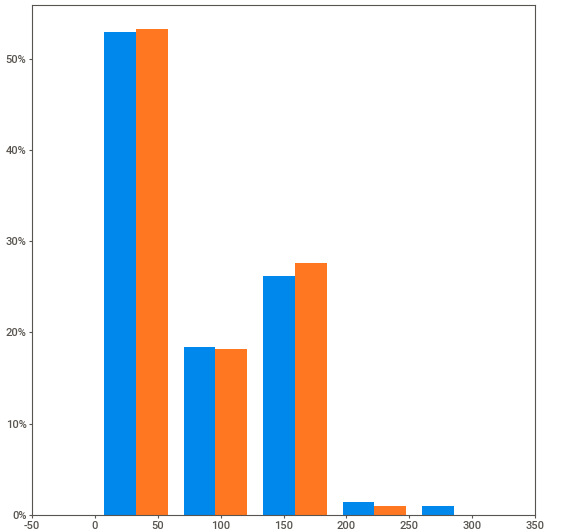
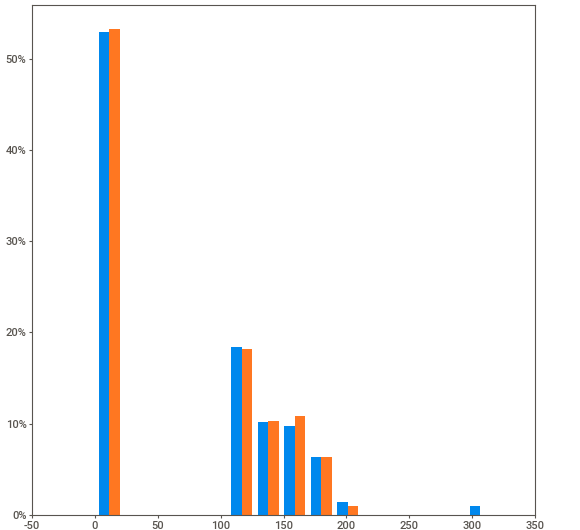
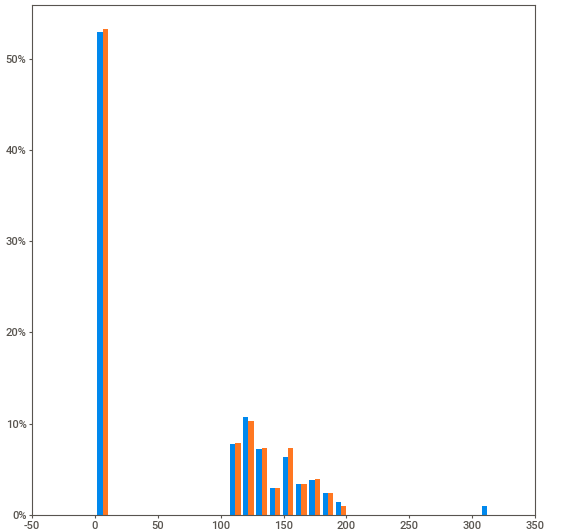
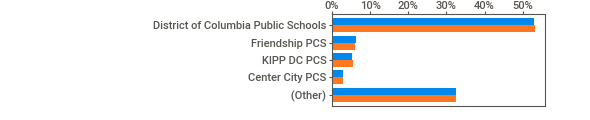
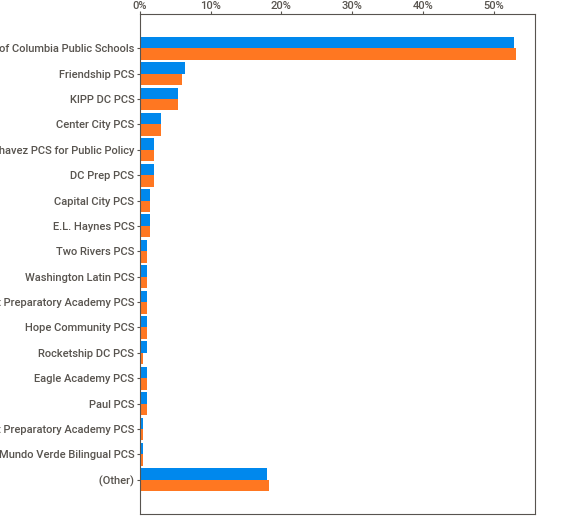
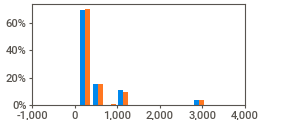
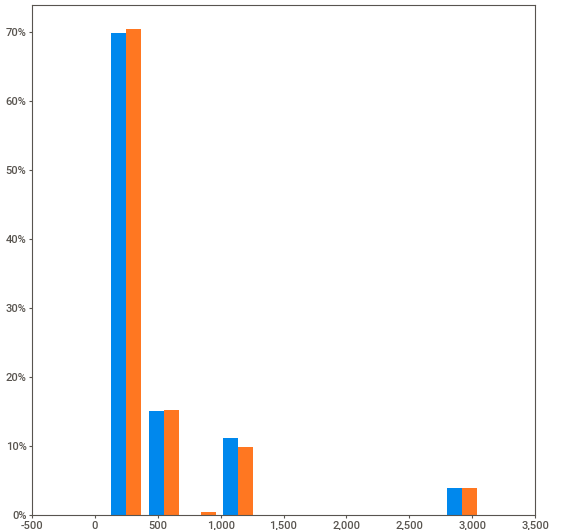
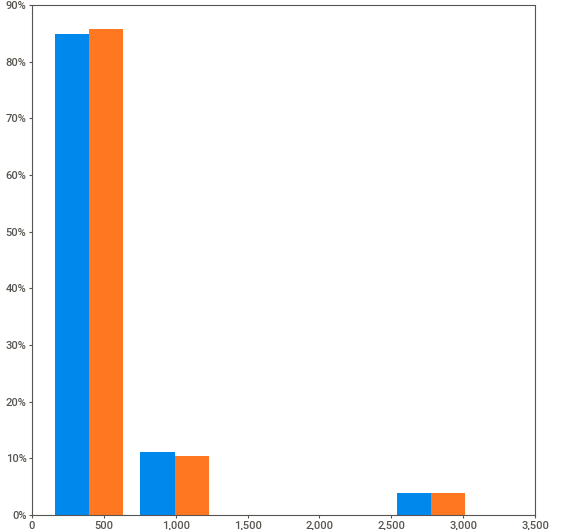
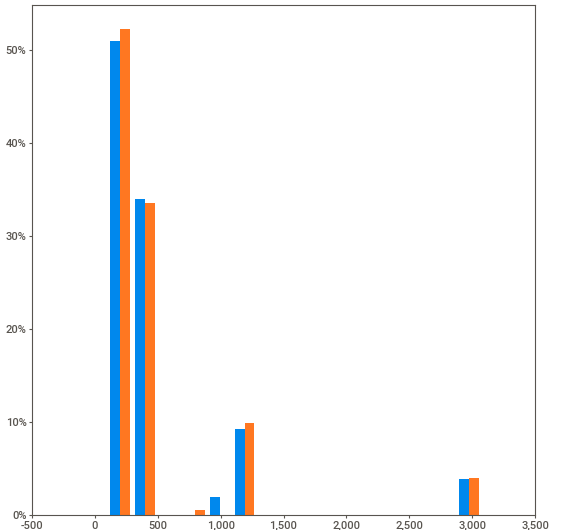
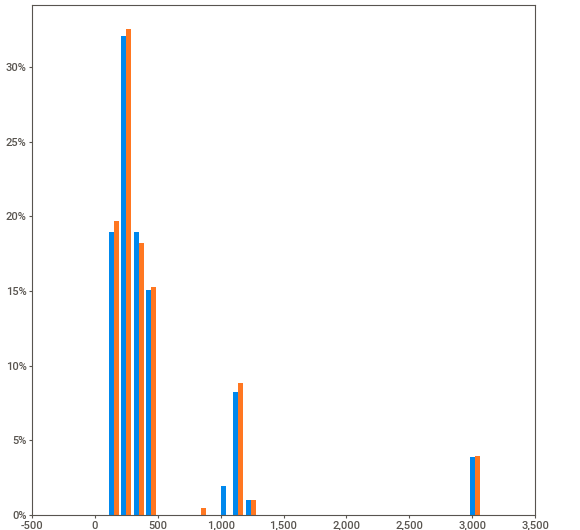
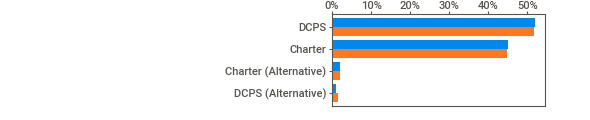
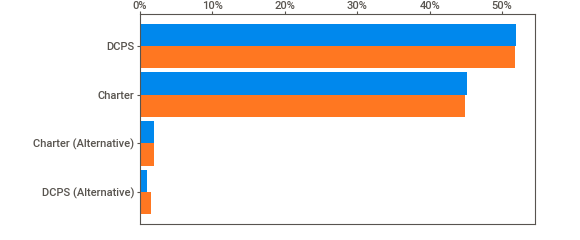
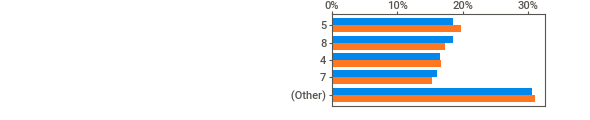
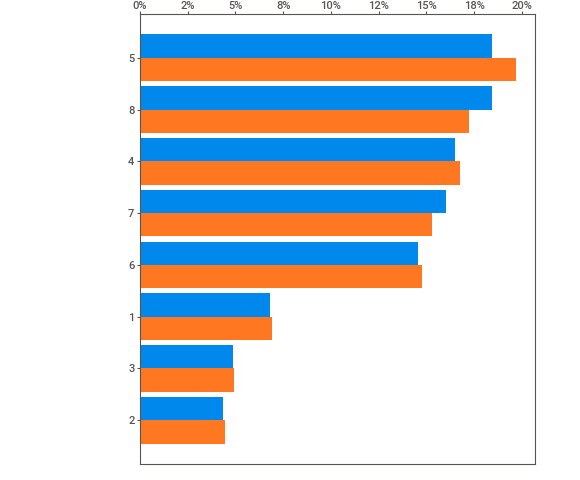
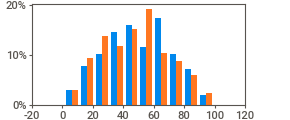
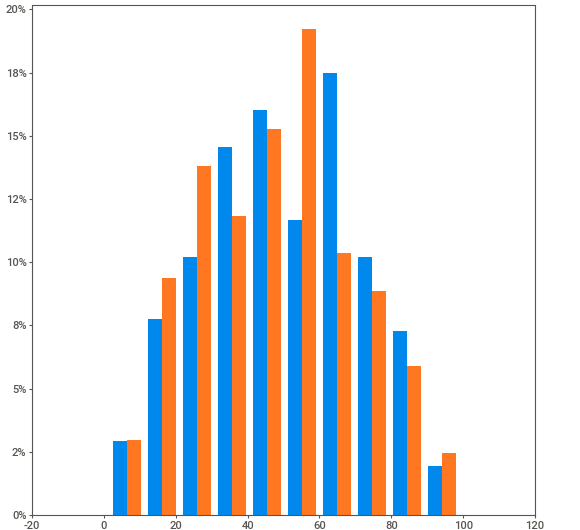
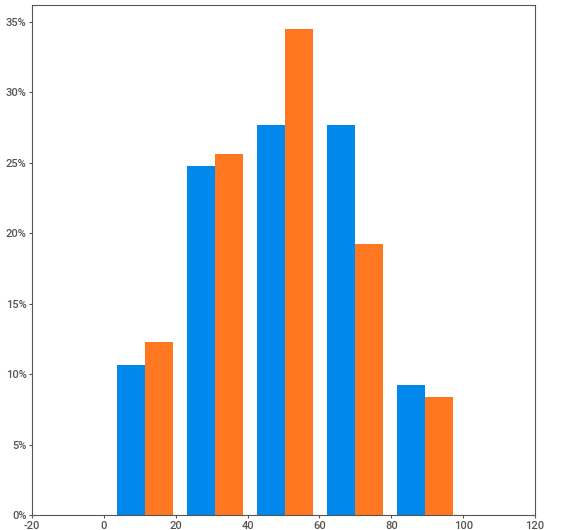
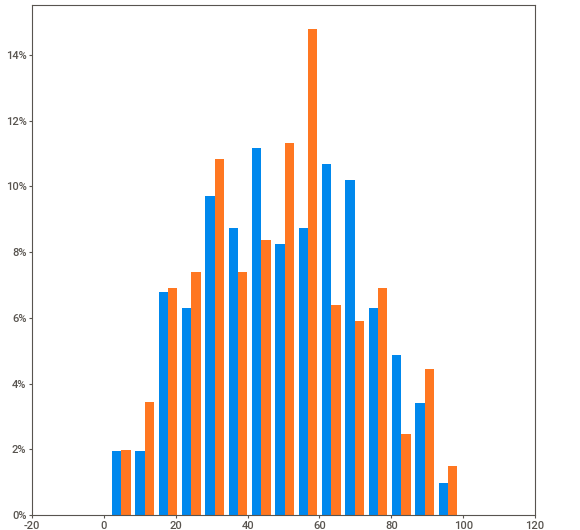
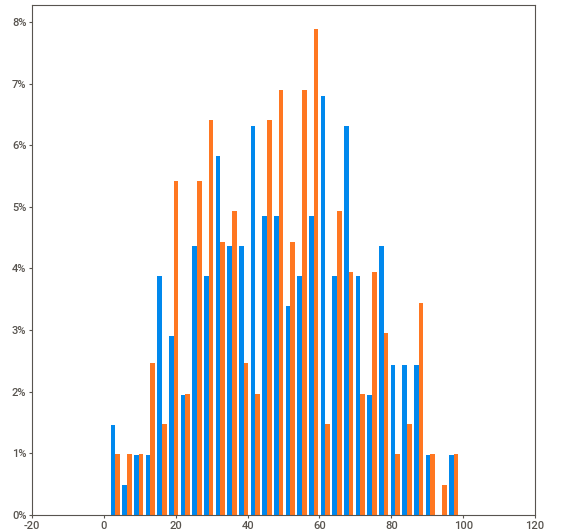
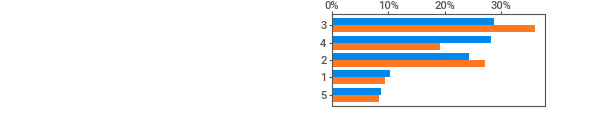
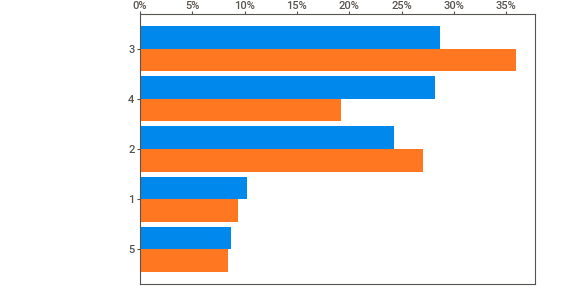
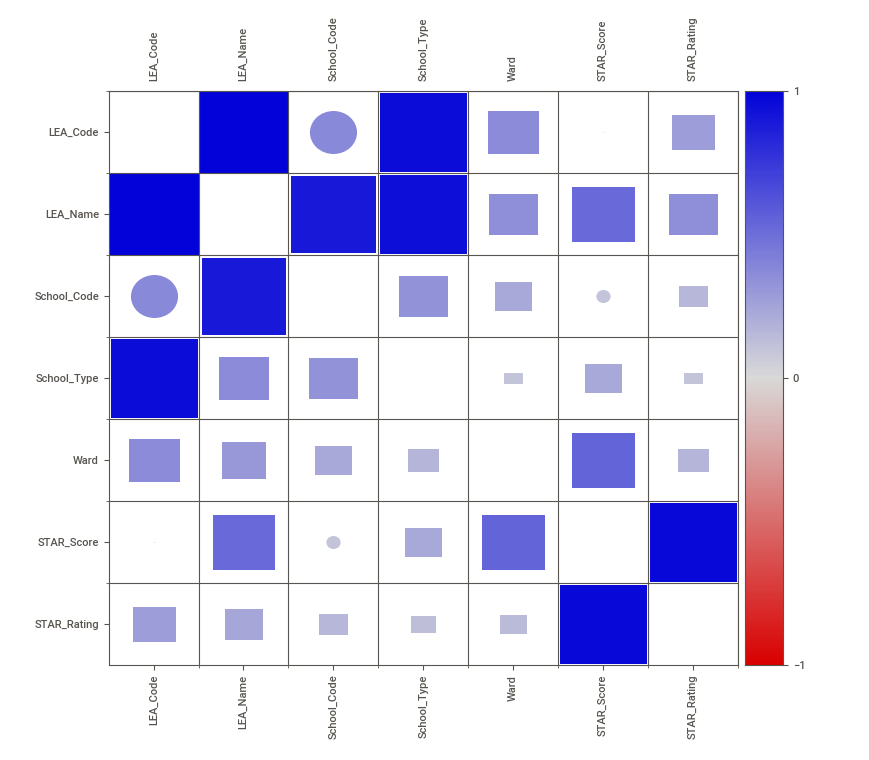
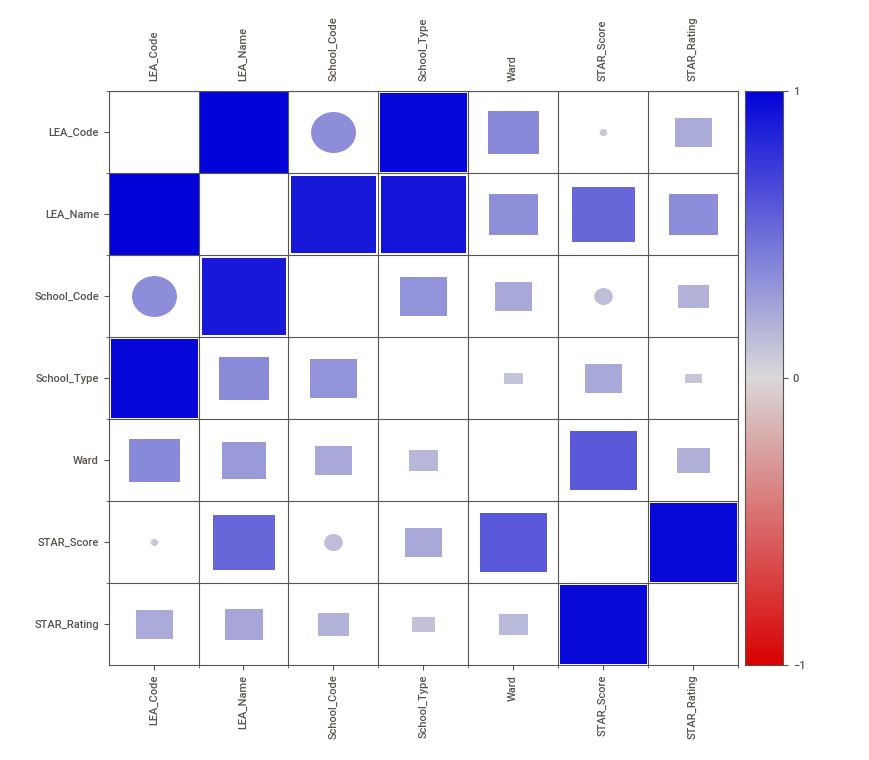

In [64]:
star_cmp = sv.compare(star_19, star_18)
star_cmp.show_notebook()

## diversity data


In [65]:
racial_1819 = pd.read_excel("../Dataset/school_spending/Diversity-Scores-for-DC-Schools_2018-19.xlsx", sheet_name='Racial and ethnic')
soc_econ_1819 = pd.read_excel("../Dataset/school_spending/Diversity-Scores-for-DC-Schools_2018-19.xlsx", sheet_name='Socioeconomic')
print(racial_1819.info())
print(soc_econ_1819.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 19 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   LEA Code                                                                             216 non-null    int64  
 1   LEA Name                                                                             216 non-null    object 
 2   School Code                                                                          216 non-null    int64  
 3   School Name                                                                          216 non-null    object 
 4   Entity Type                                                                          216 non-null    object 
 5   Ward                                                                                 216 non

In [66]:
racial_1819.columns = racial_1819.columns.str.replace(" ", "_")
soc_econ_1819.columns = soc_econ_1819.columns.str.replace(" ", "_")
print(racial_1819.isnull().sum())
print(soc_econ_1819.isnull().sum())

LEA_Code                                                                                0
LEA_Name                                                                                0
School_Code                                                                             0
School_Name                                                                             0
Entity_Type                                                                             0
Ward                                                                                    0
Total_Count_of_Students                                                                 0
American_Indian/Alaskan_Native_(%)                                                      0
Asian_(%)                                                                               0
Black_(%)                                                                               0
Latinx_(%)                                                                              0
Native_Haw

In [67]:
cols_to_use = list(racial_1819.columns.difference(soc_econ_1819.columns))
diversity_1819 = soc_econ_1819.merge(racial_1819[cols_to_use+['School_Code']],  on=['School_Code'])
diversity_1819.head()

LEA_Code                             LEA_Name  School_Code  \
0       155  Achievement Preparatory Academy PCS          217   
1       155  Achievement Preparatory Academy PCS         1100   
2         1  District of Columbia Public Schools          202   
3         1  District of Columbia Public Schools          203   
4         1  District of Columbia Public Schools          450   

                                         School_Name Entity_Type  Ward  \
0  Achievement Preparatory Academy PCS - Wahler P...     Charter     8   
1  Achievement Preparatory Academy PCS - Wahler P...     Charter     8   
2                            Aiton Elementary School        DCPS     7   
3                     Amidon-Bowen Elementary School        DCPS     6   
4                              Anacostia High School        DCPS     8   

   Total_Count_of_Students  At-Risk_(%)  Not_at-risk_(%)  \
0                      379           67               33   
1                      459           65               35   
2                      268           76               24   
3                      362           63               37   
4                      392           81               19   

   Socieconomic_Diversity_Score,_2018-19_(%)  ... Asian_(%) Black_(%)  \
0                                         33  ...         0        97   
1                                         35  ...         0        98   
2                                         24  ...         0        96   
3                                         37  ...         1        81   
4                                         19  ...         0        97   

   Change_in_Racial/Ethnic_Diversity_Score_from_2016-17_to_2018-19_(percentage_points)  \
0                                          -0.200001                                     
1                                          -1.200001                                     
2                                           3.599999                                     
3                                           6.699997                                     
4                                           1.900002                                     

   Latinx_(%)  Most_racially_and_ethnically_diverse_flag  \
0           2                                      Other   
1           1                                      Other   
2           3                                      Other   
3           5                                      Other   
4           2                                      Other   

   Native_Hawaiian/Other_Pacific_Islander_(%)  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Racial/Ethnic_Diversity_Score,_2016-17_(%)  \
0                                    3.200001   
1                                    3.200001   
2                                    0.400001   
3                                   12.300003   
4                                    1.099998   

   Racial/Ethnic_Diversity_Score,_2018-19_(%)  Two_or_more_races_(%) White_(%)  
0                                           3                      0         0  
1                                           2                      1         0  
2                                           4                      0         1  
3                                          19                      4         9  
4                                           3                      0         0  

[5 rows x 25 columns]

                                             |          | [  0%]   00:00 -> (? left)


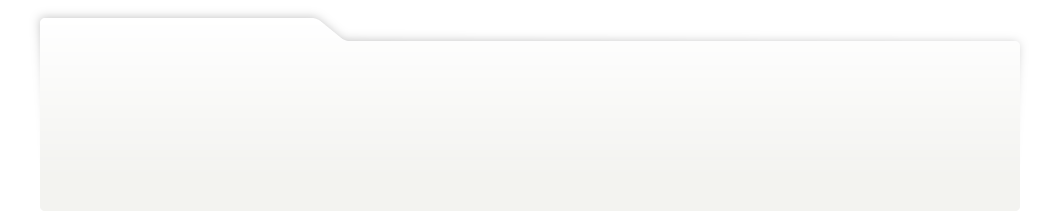
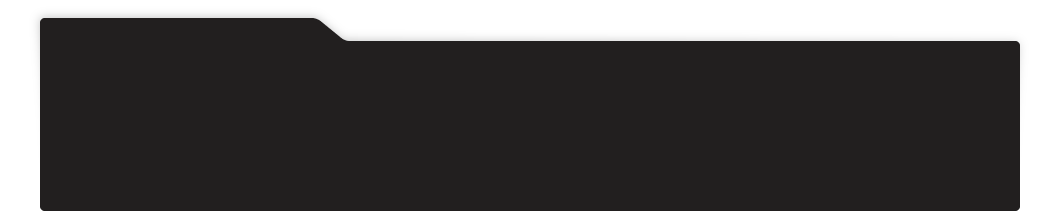
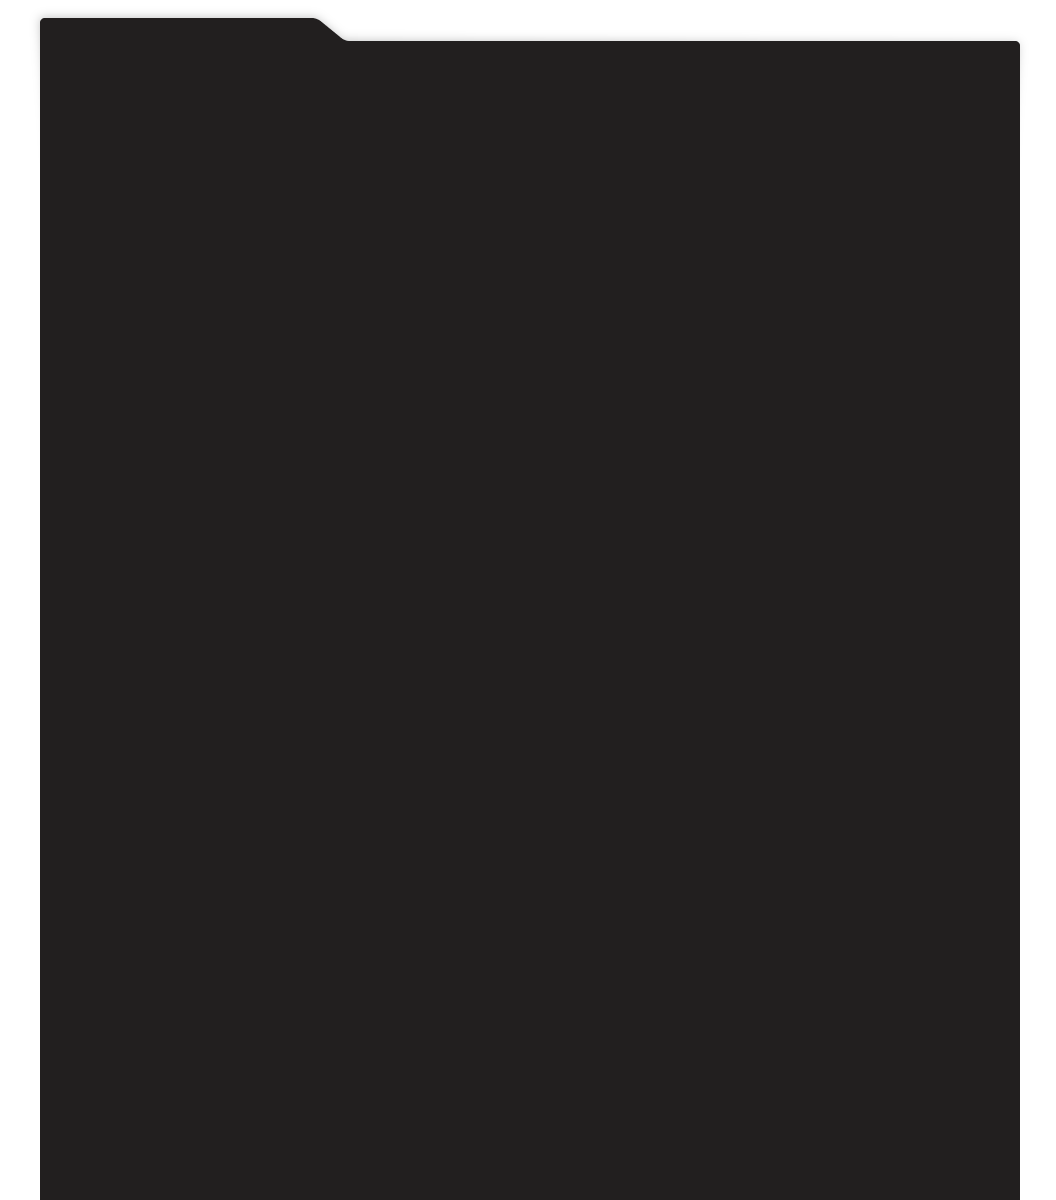
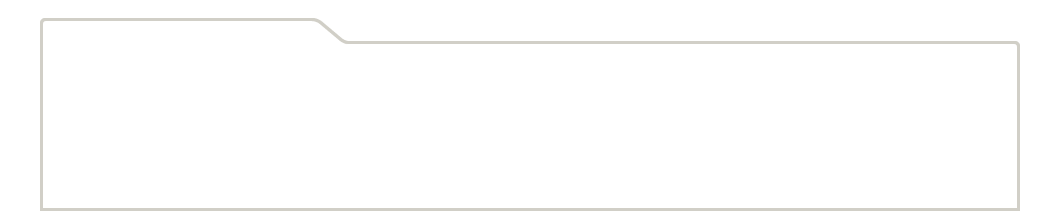
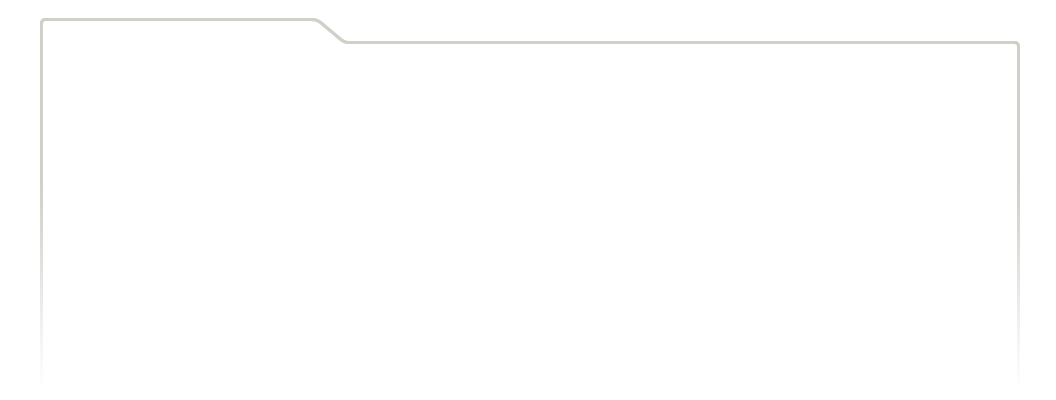
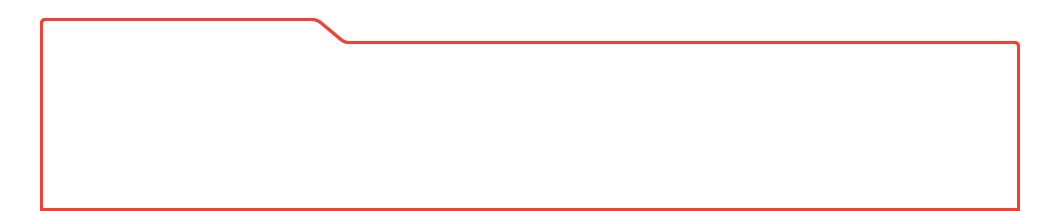
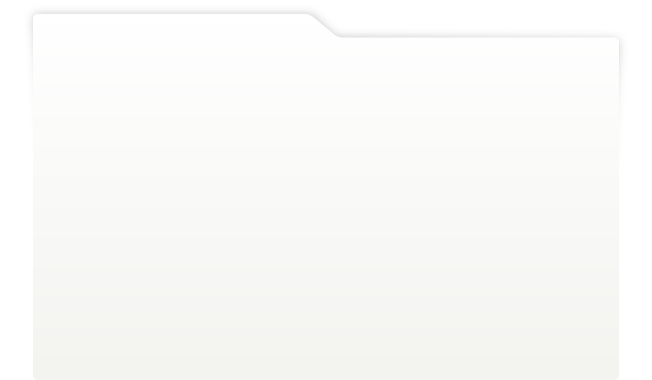
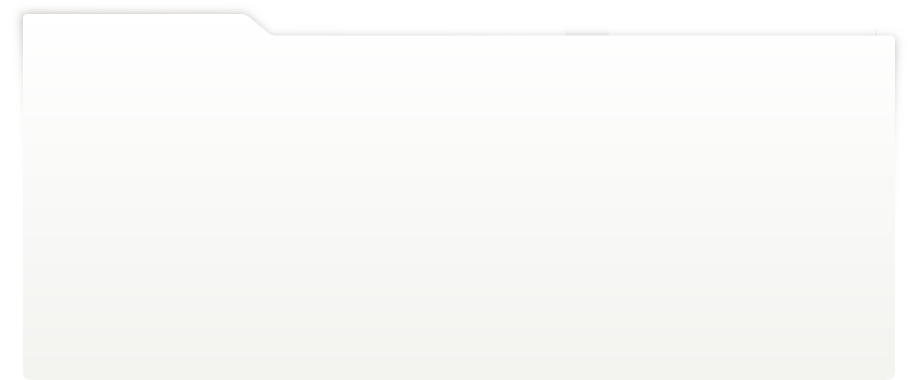
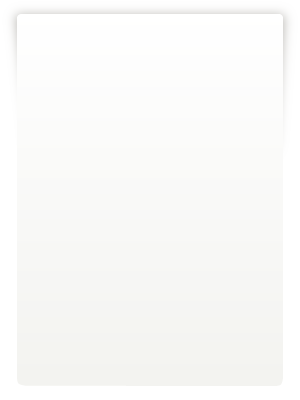
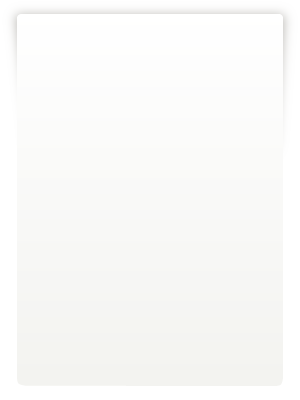
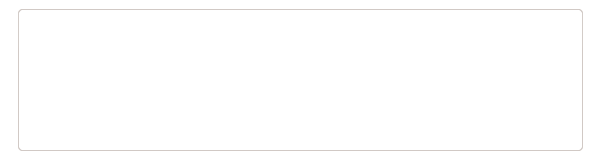
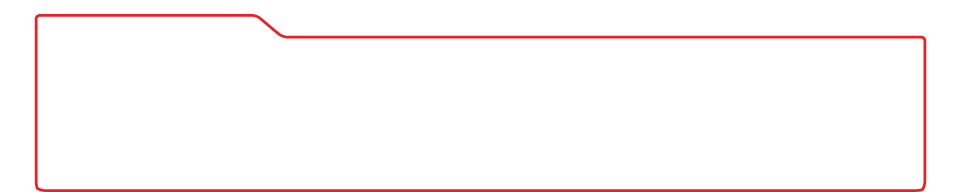
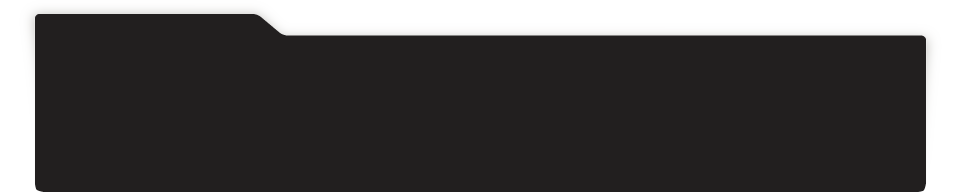
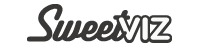
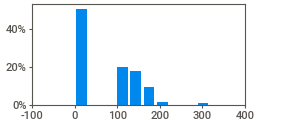
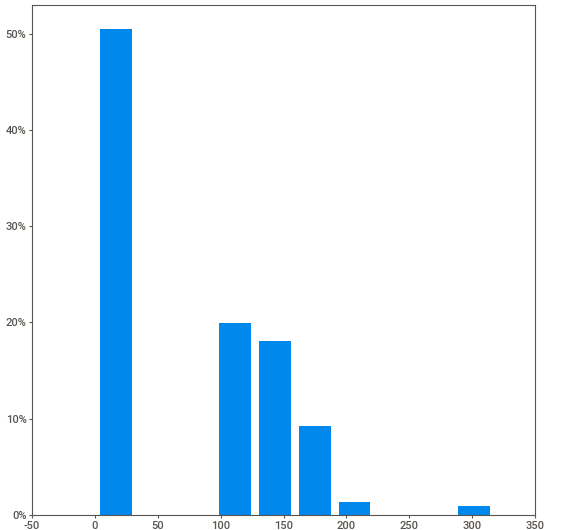
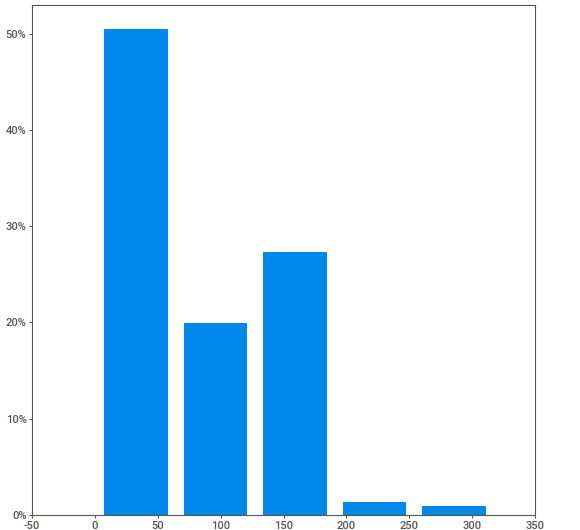
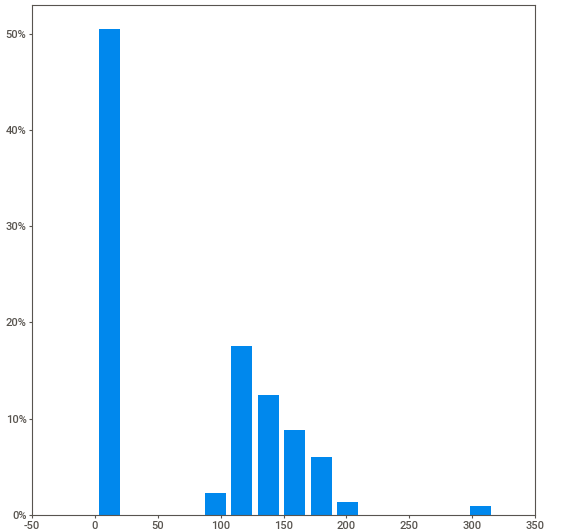
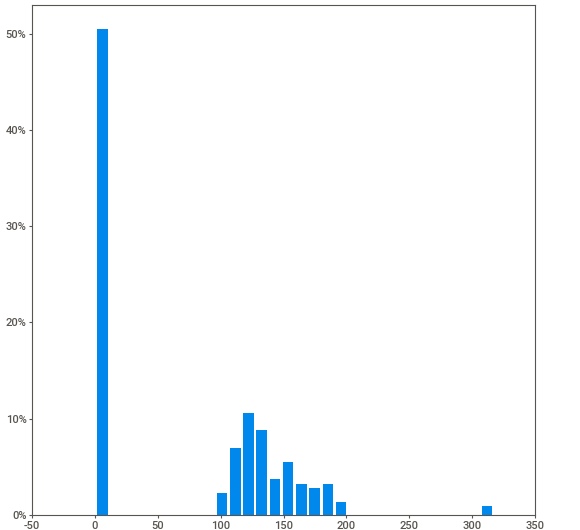
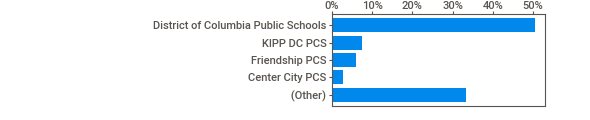
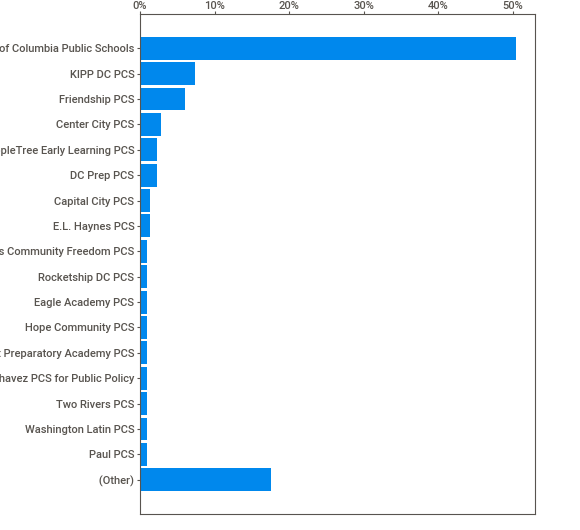
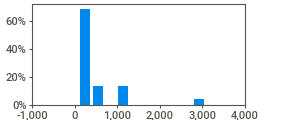
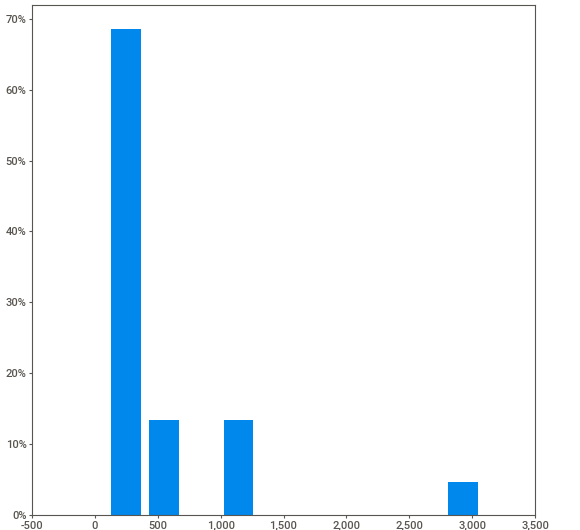
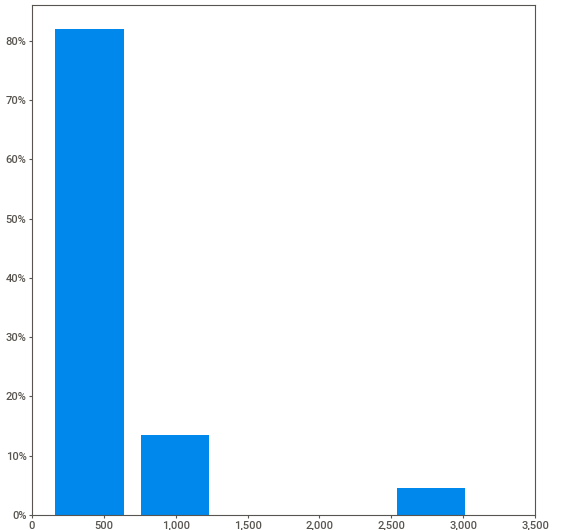
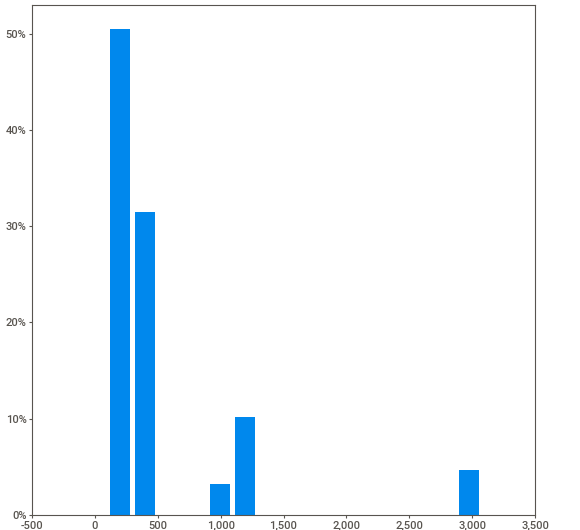
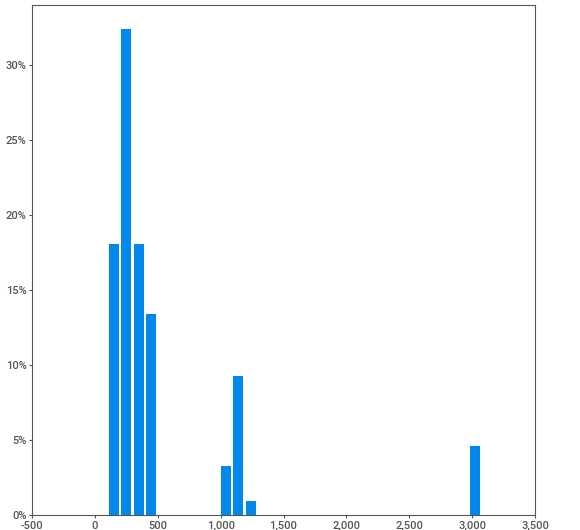
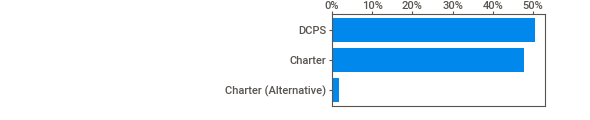
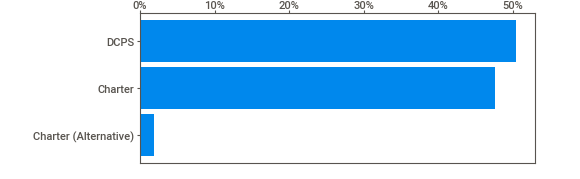
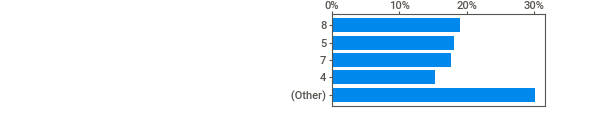
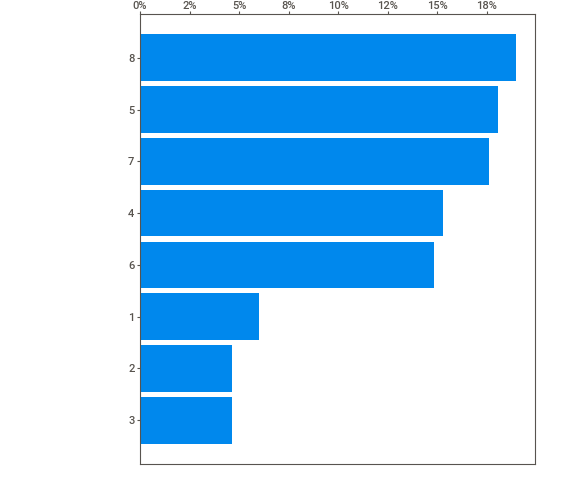
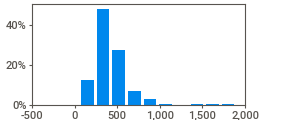
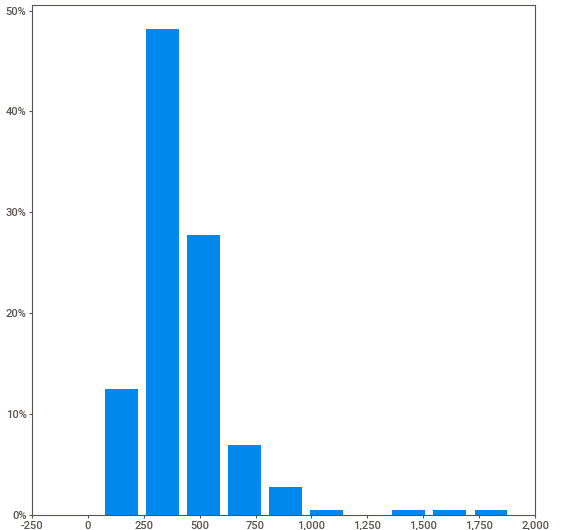
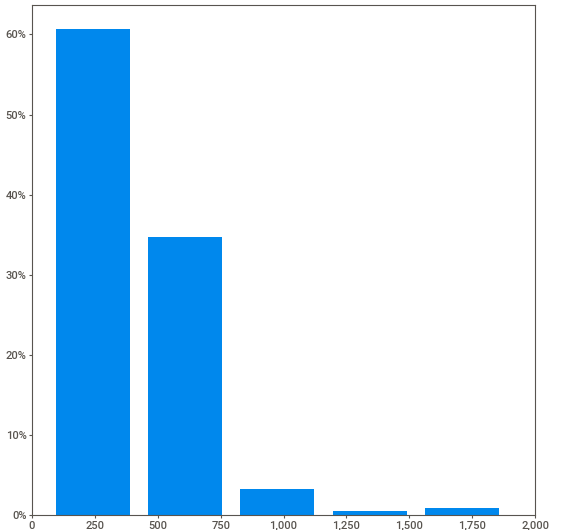
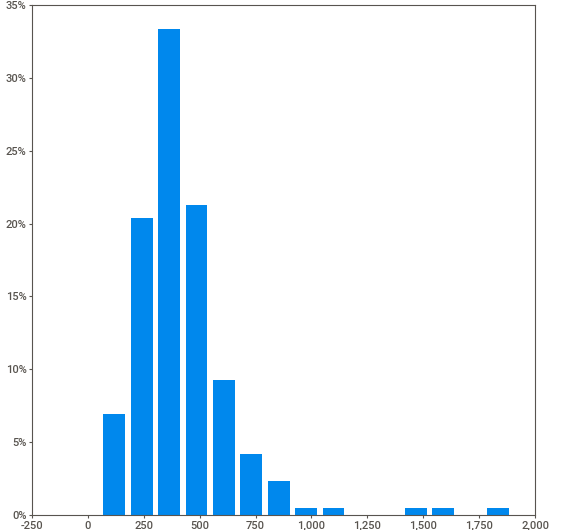
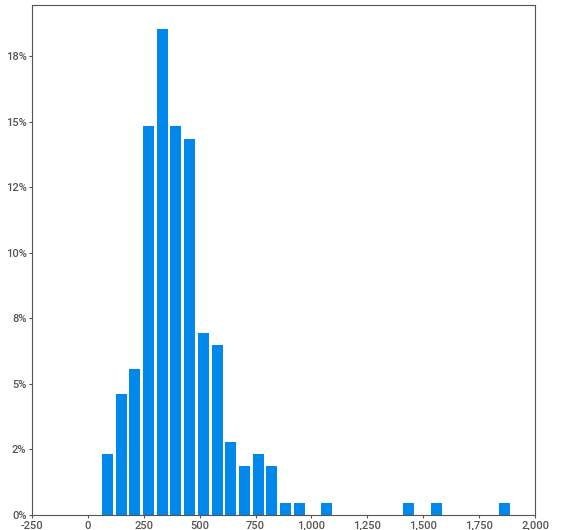
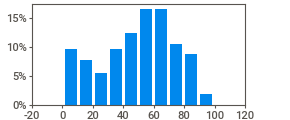
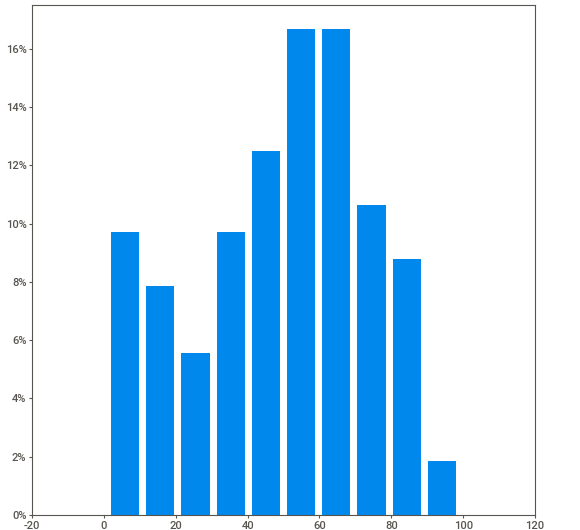
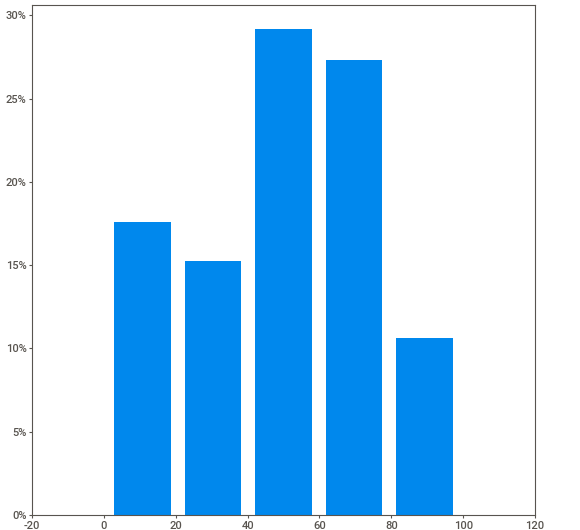
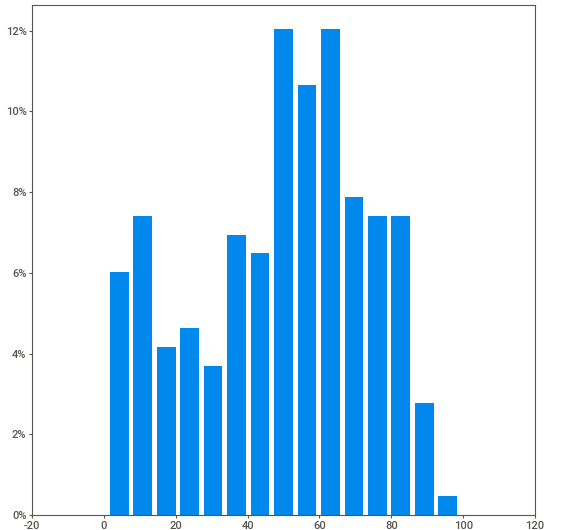
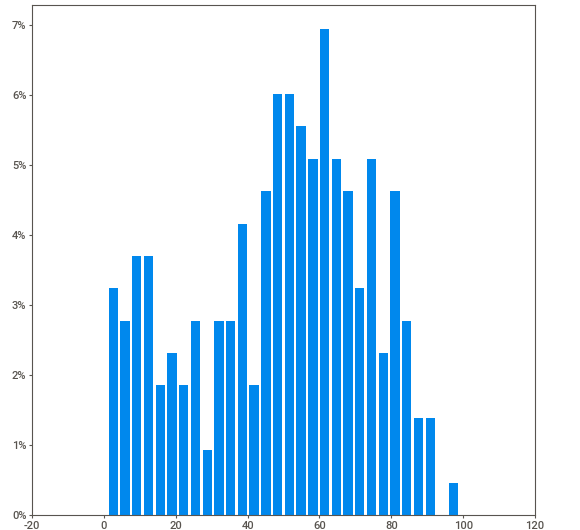
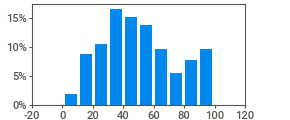
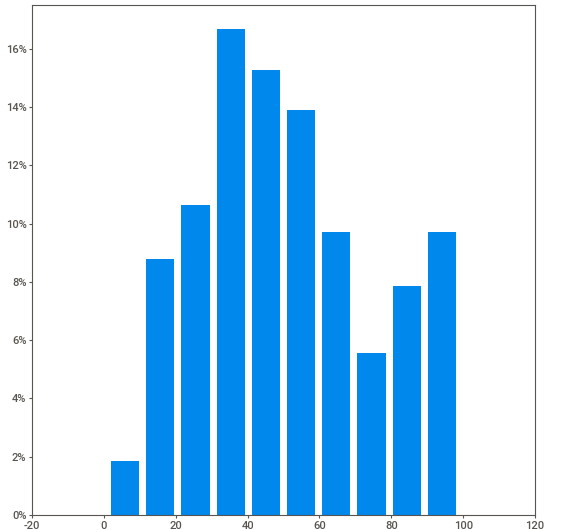
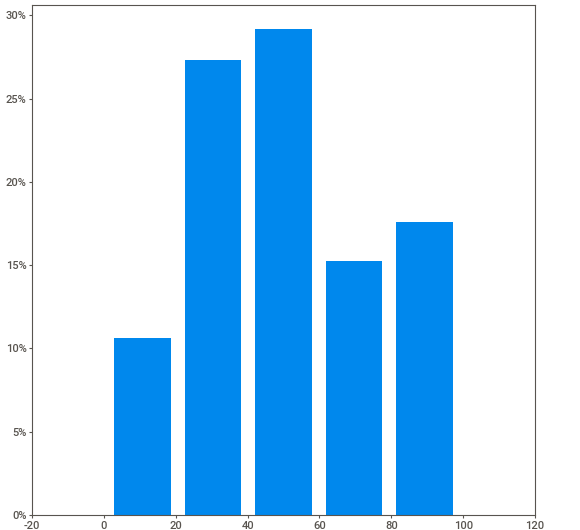
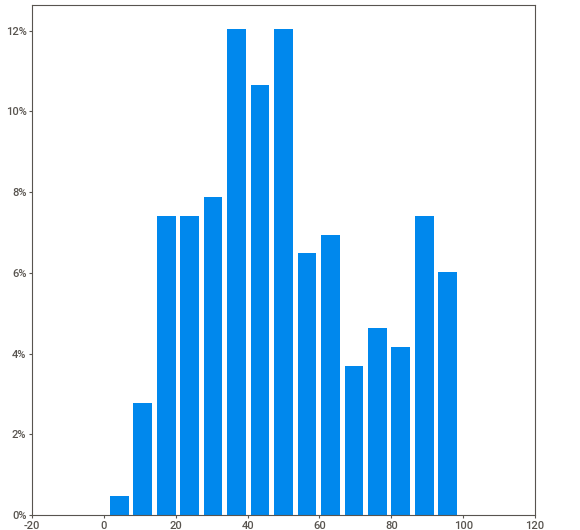
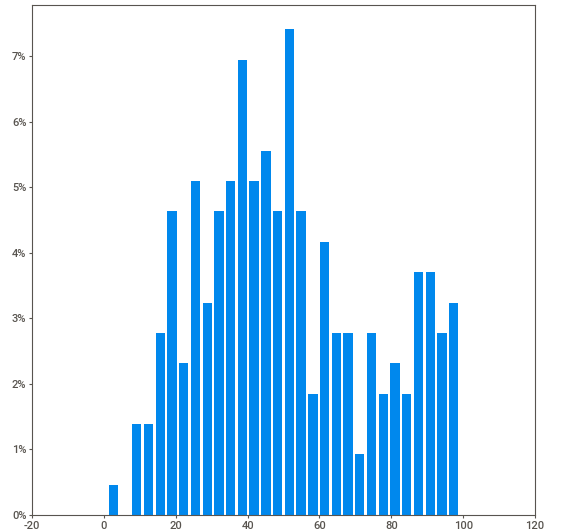
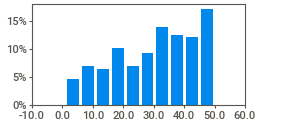
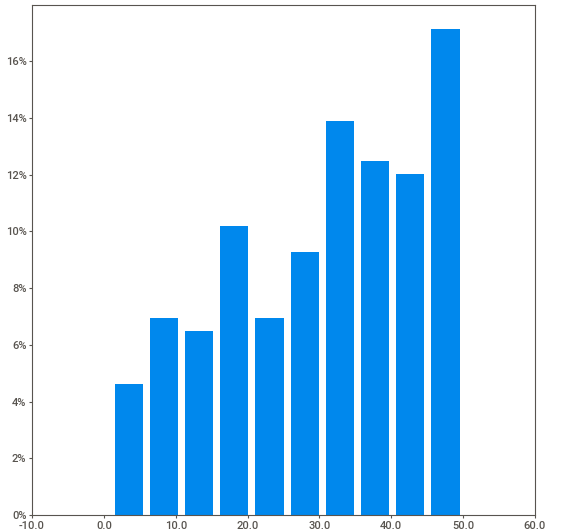
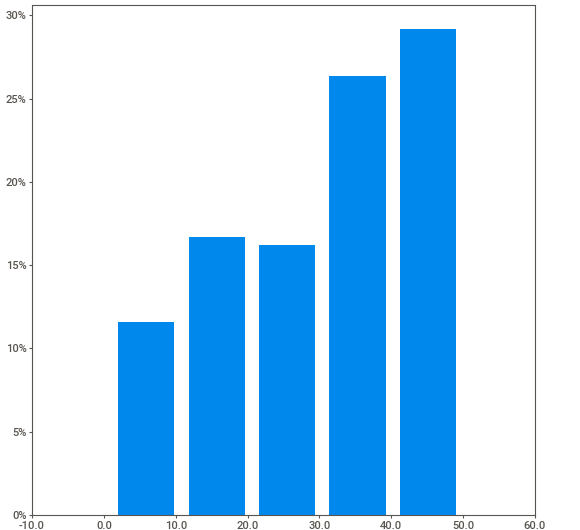
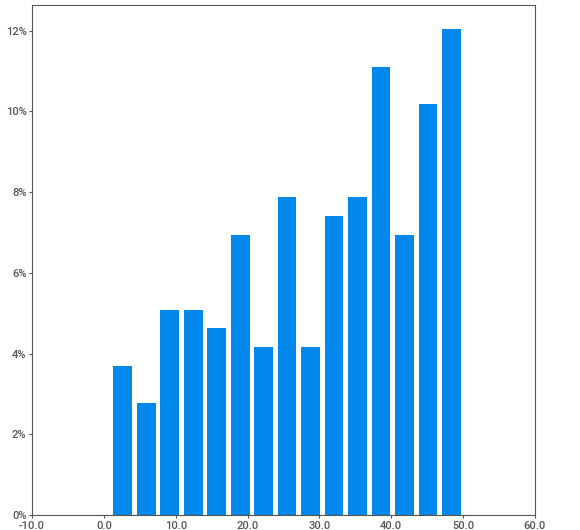
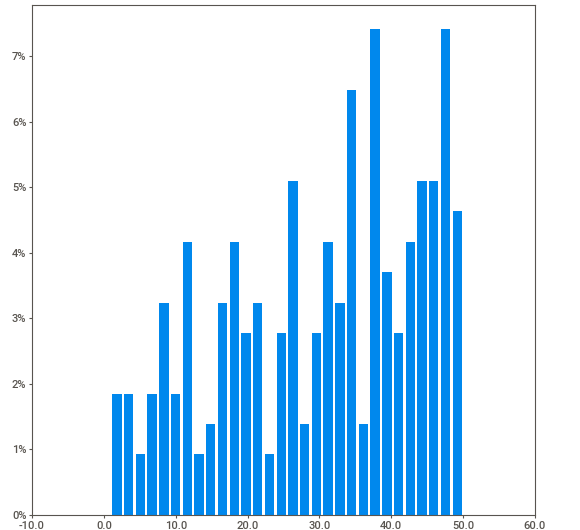
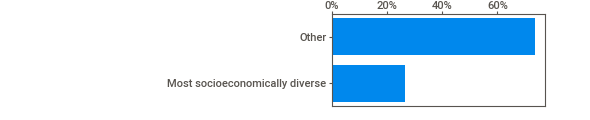
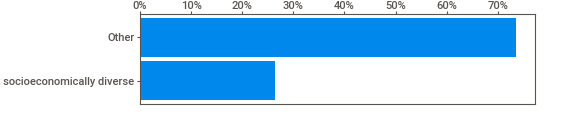
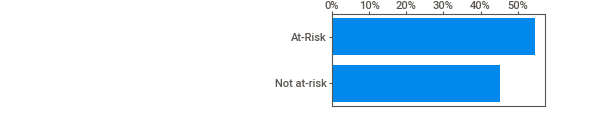
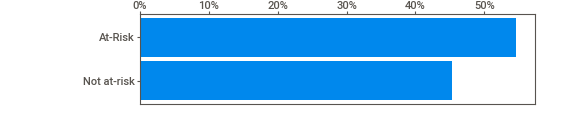
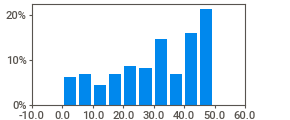
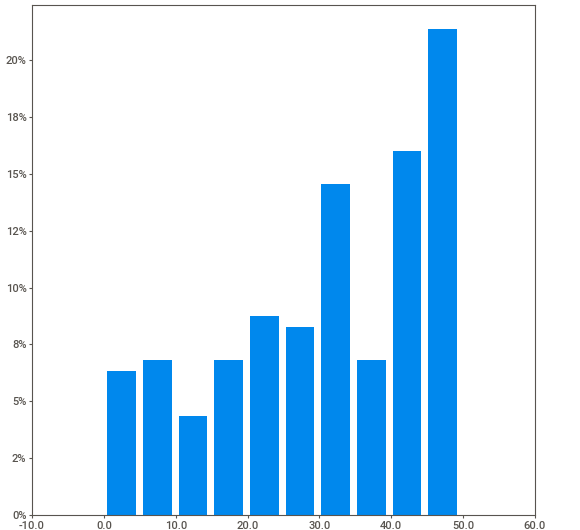
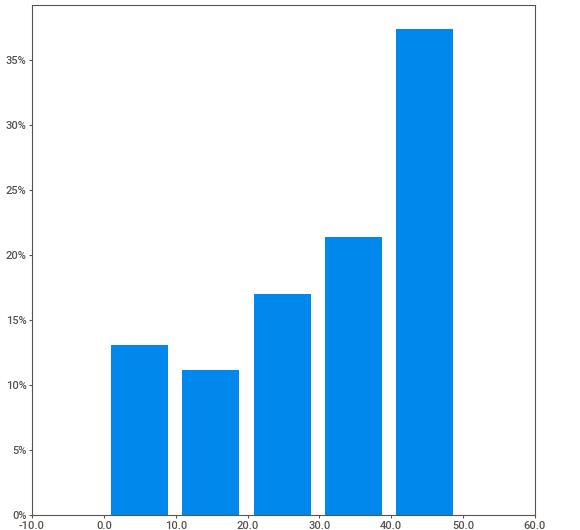
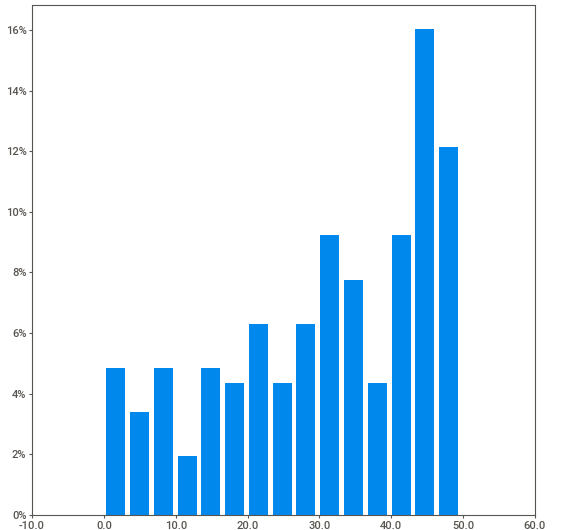
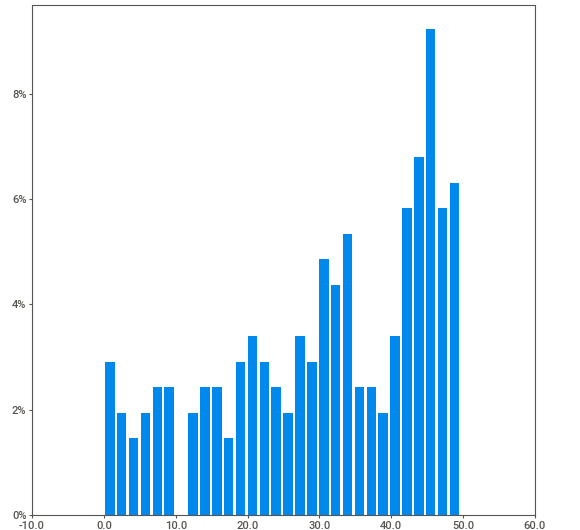
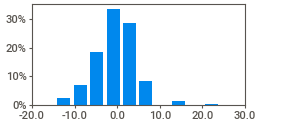
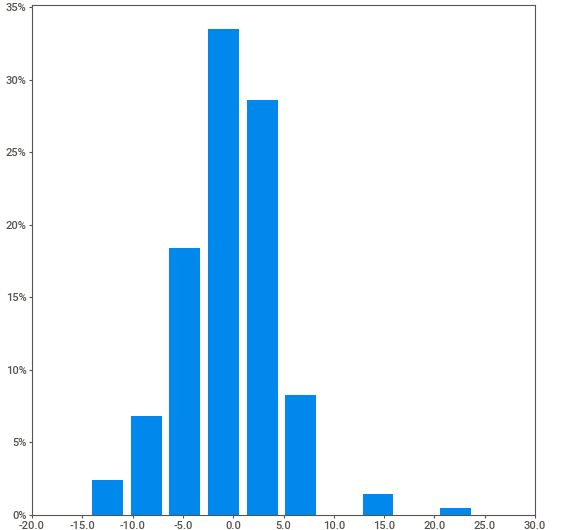
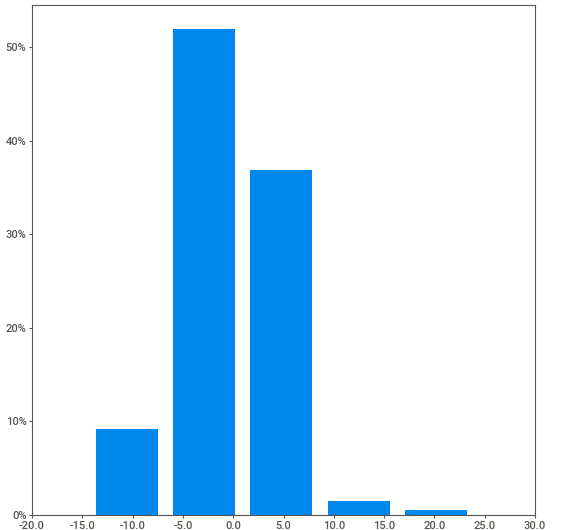
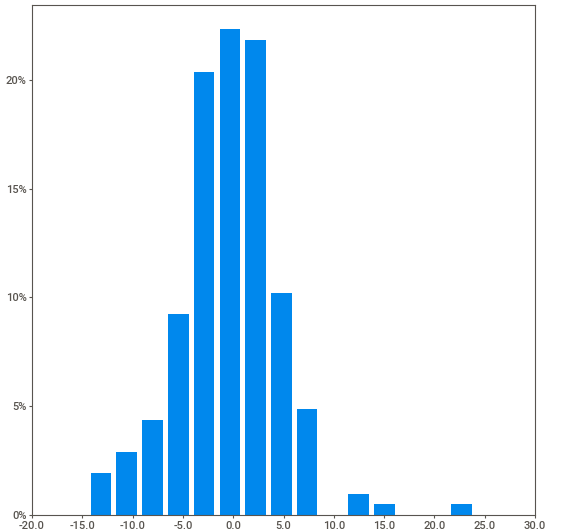
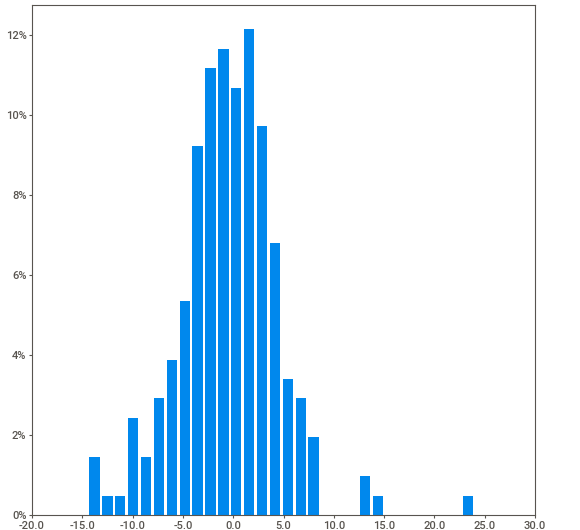
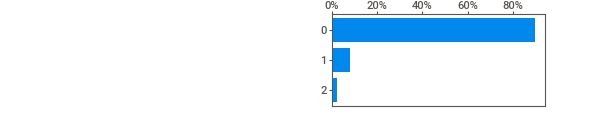
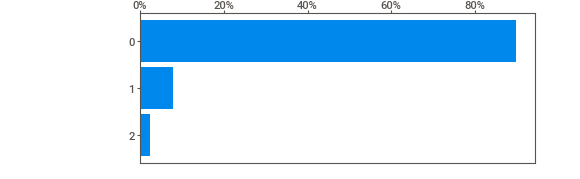
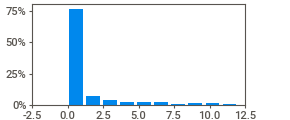
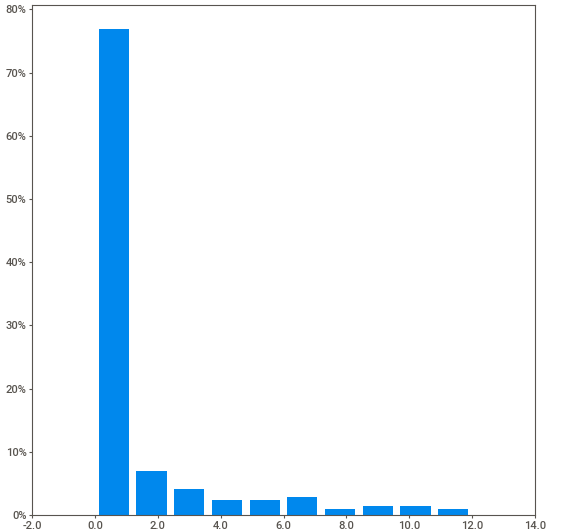
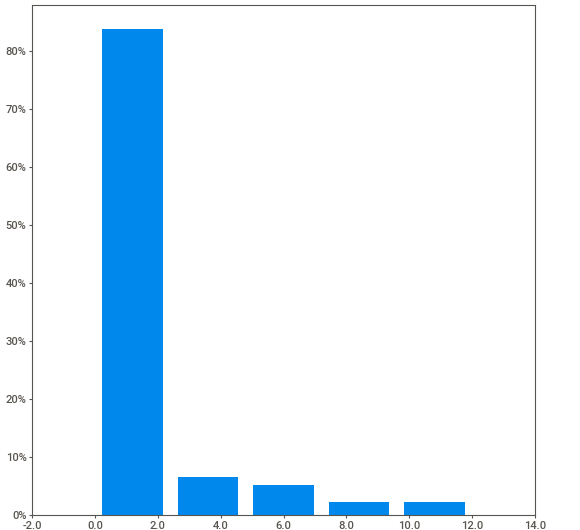
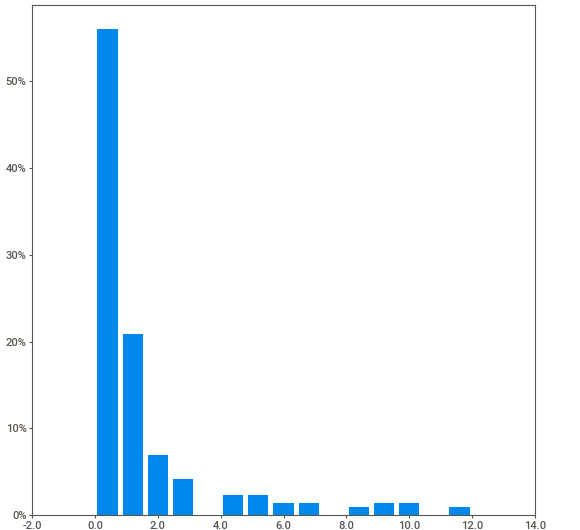
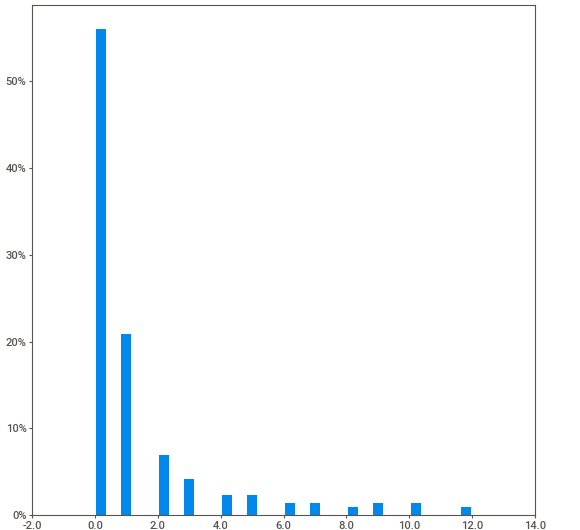
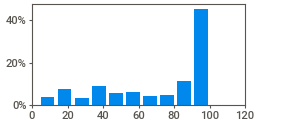
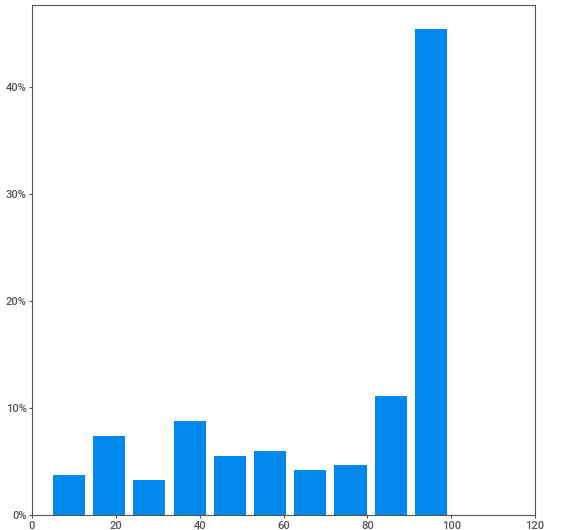
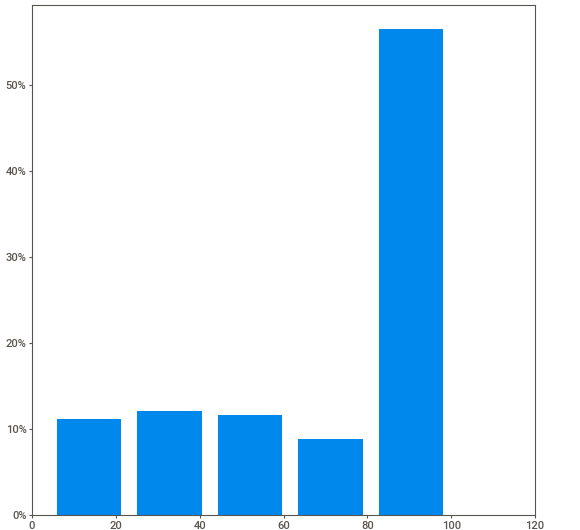
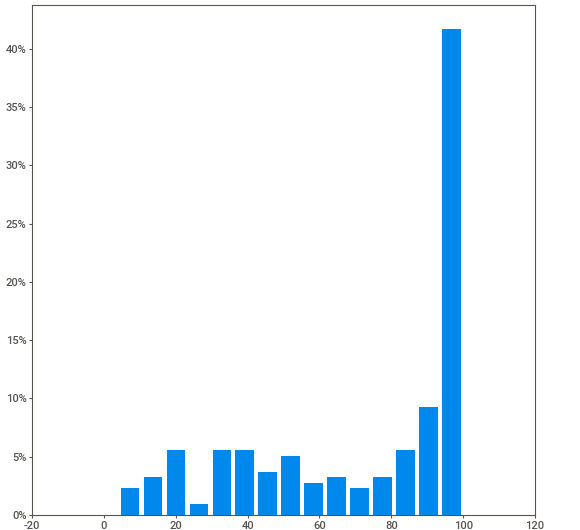
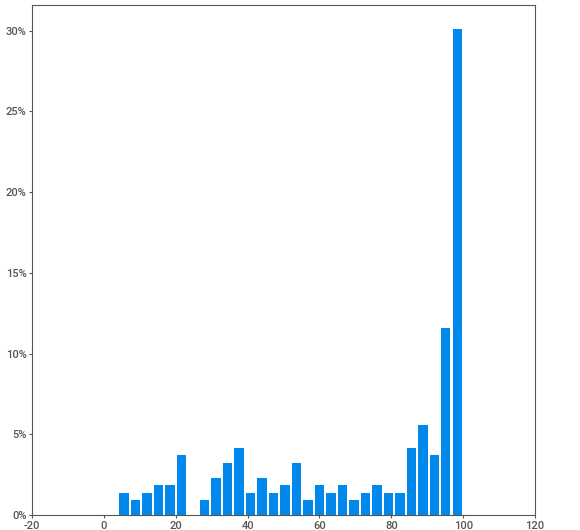
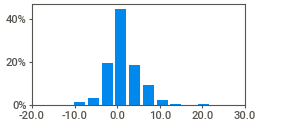
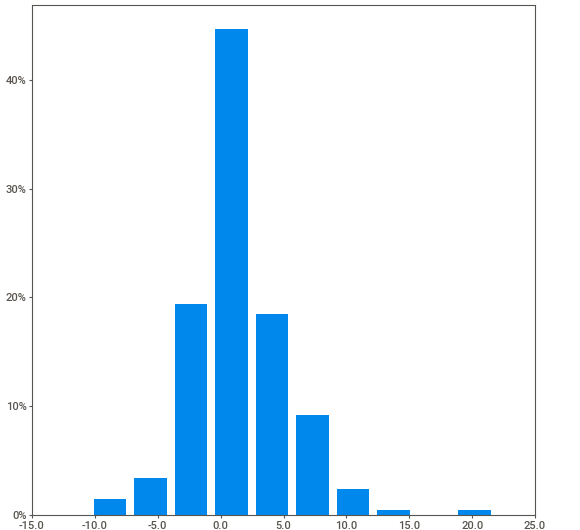
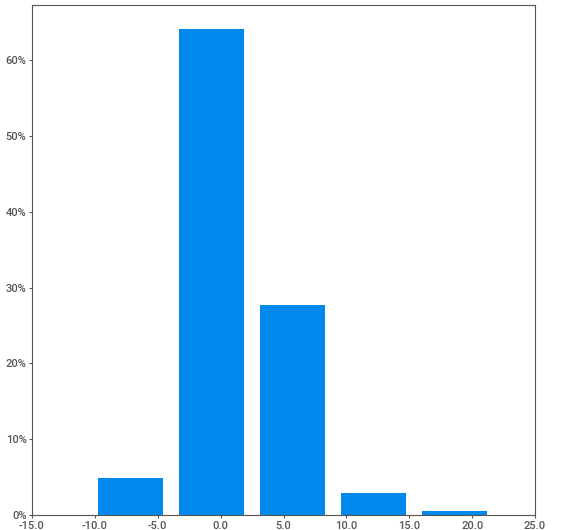
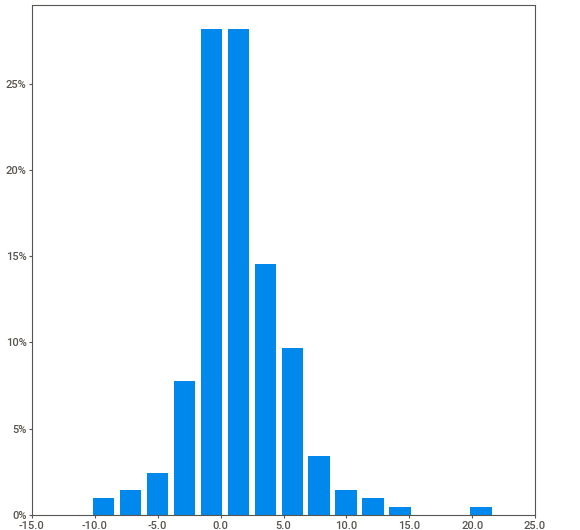
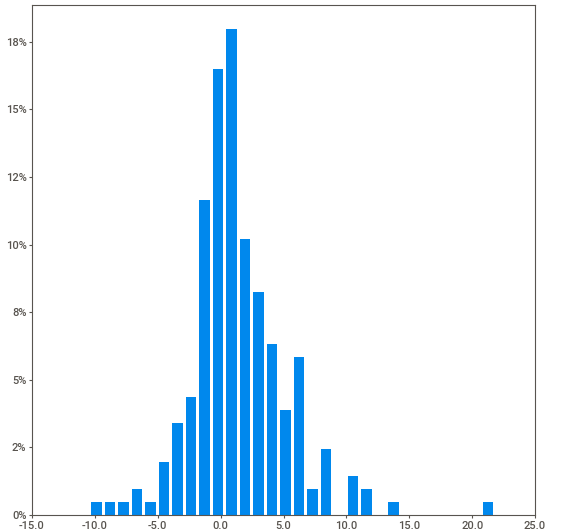
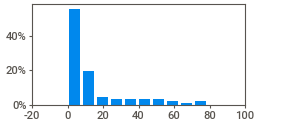
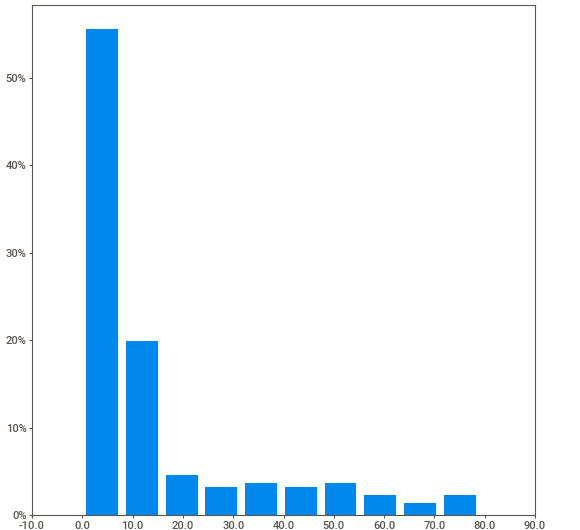
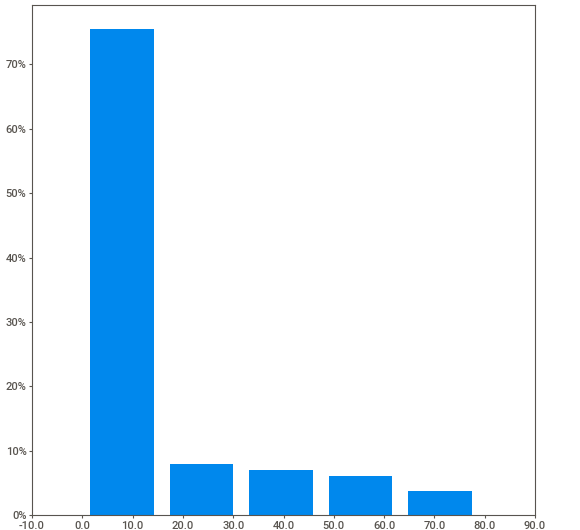
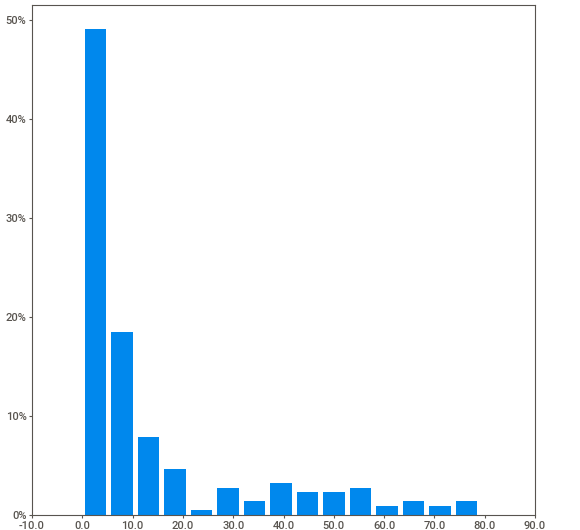
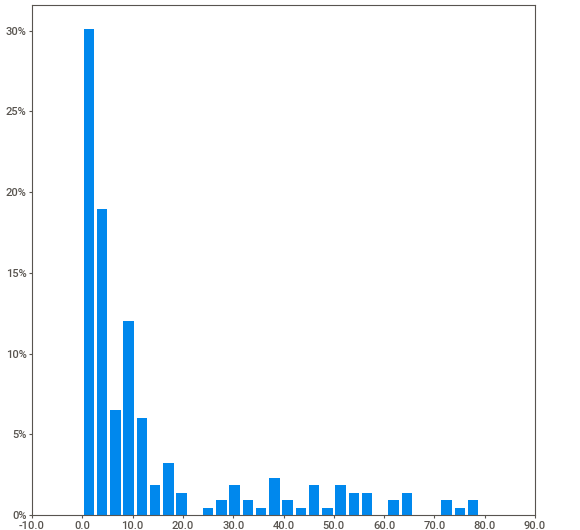
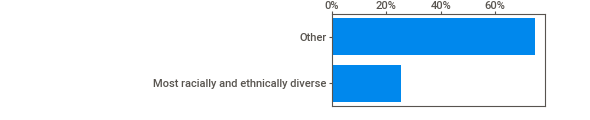
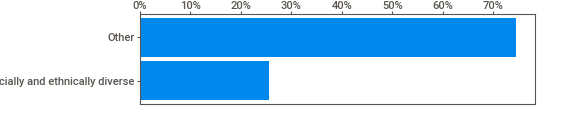
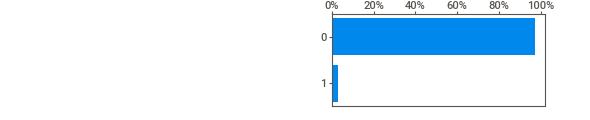
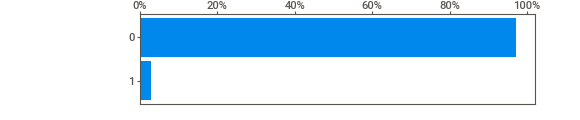
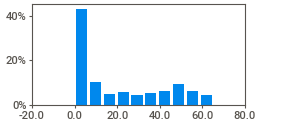
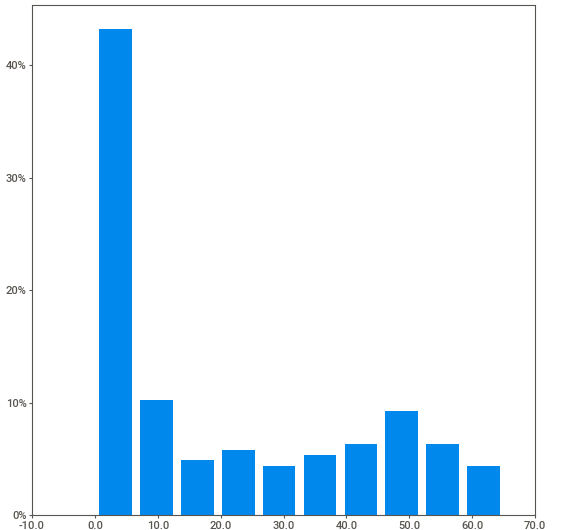
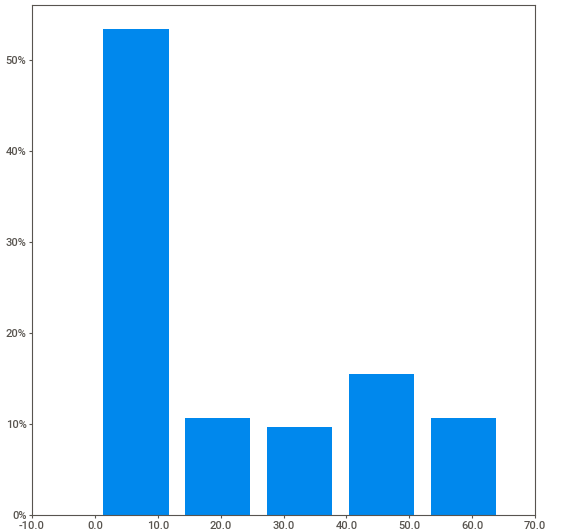
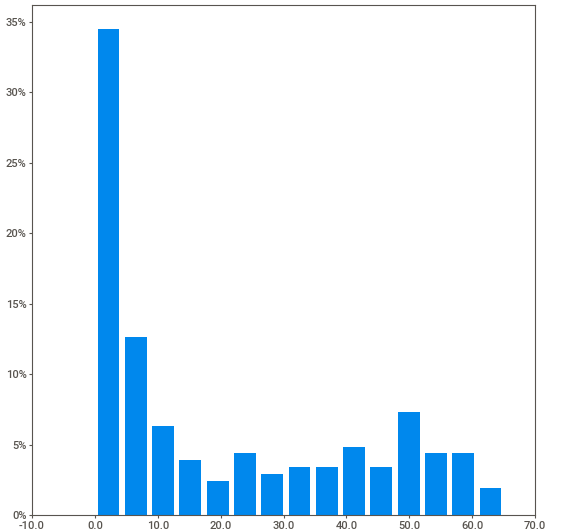
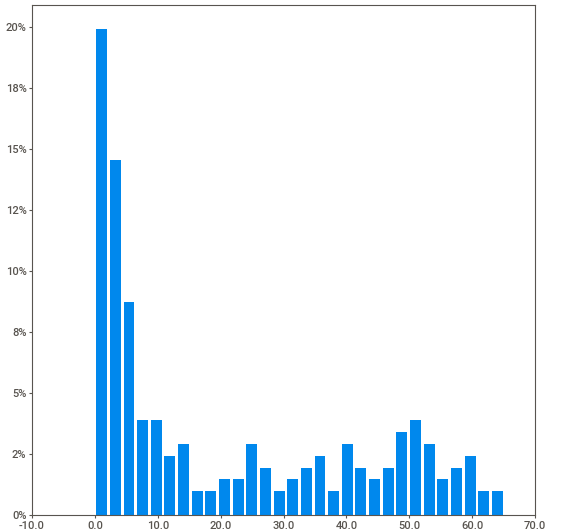
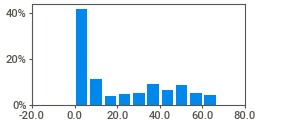
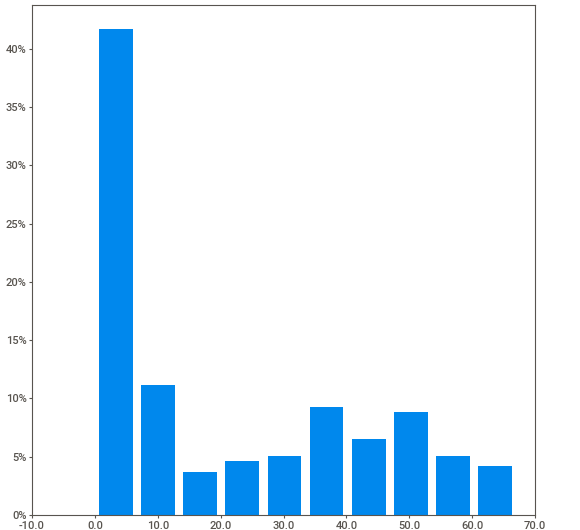
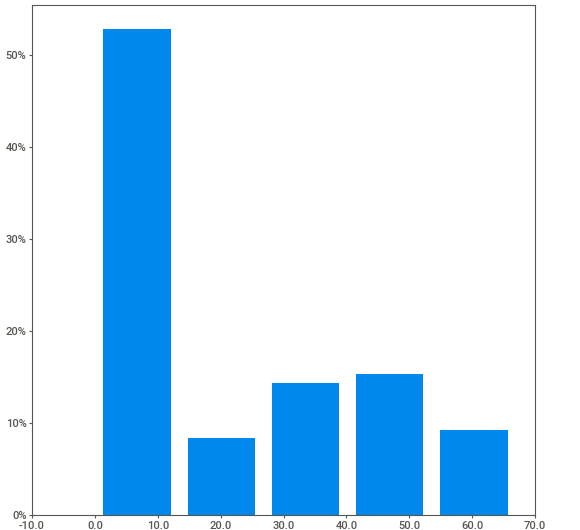
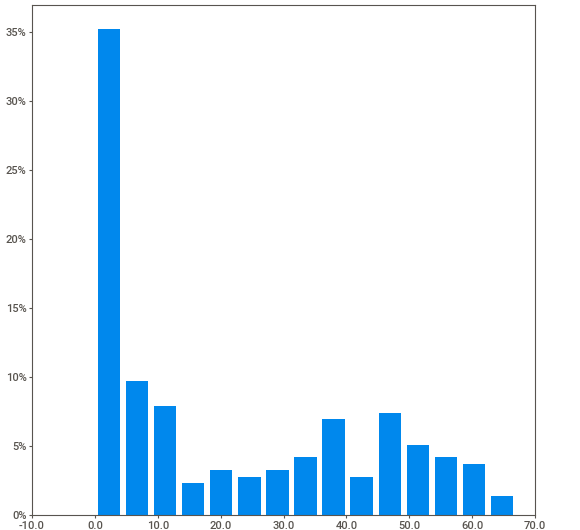
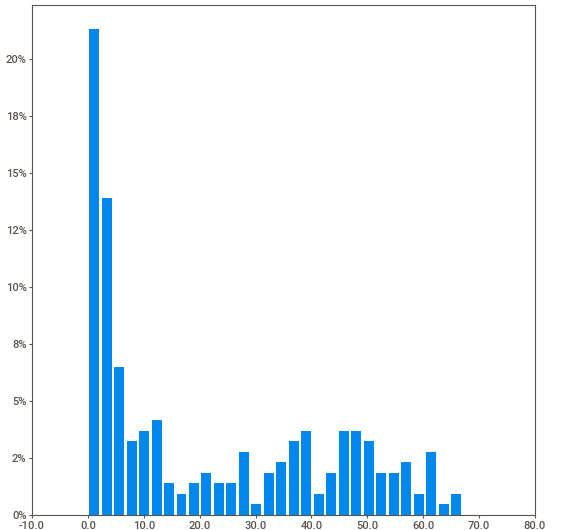
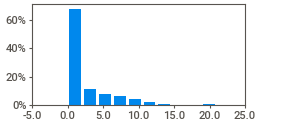
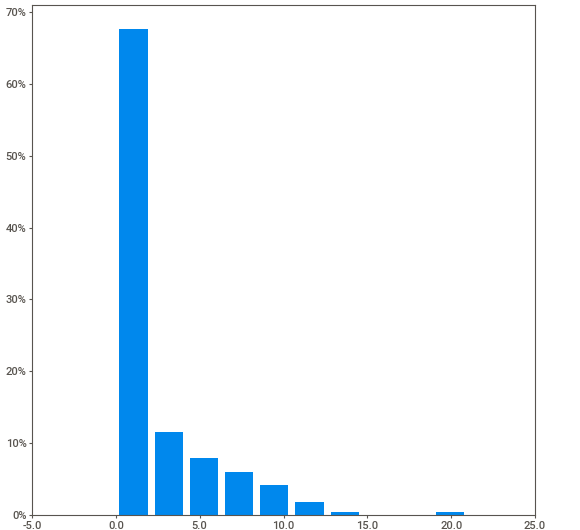
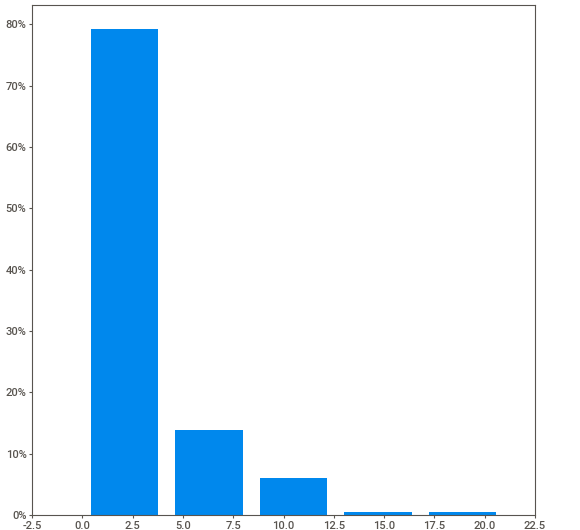
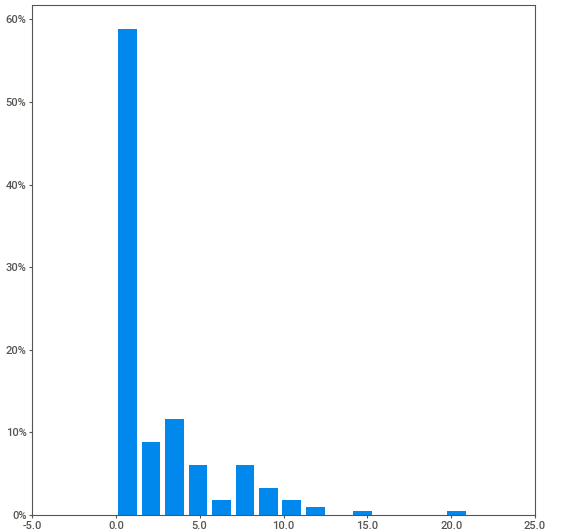
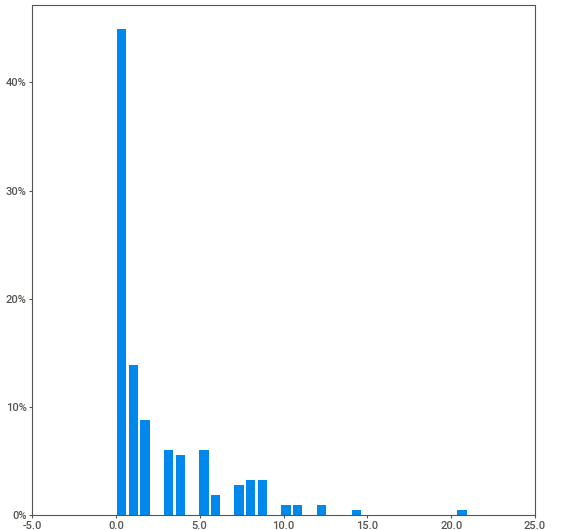
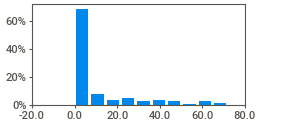
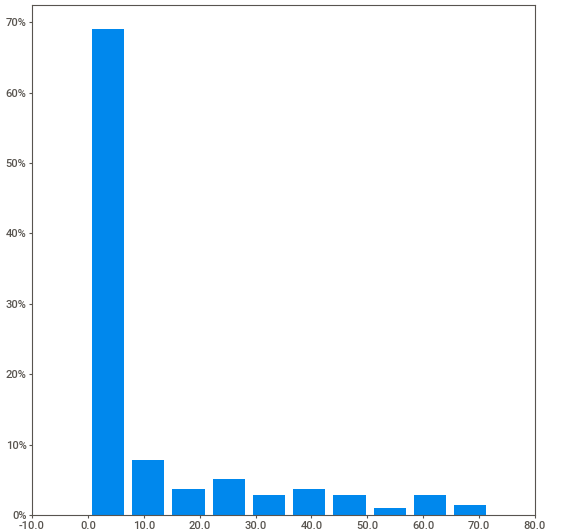
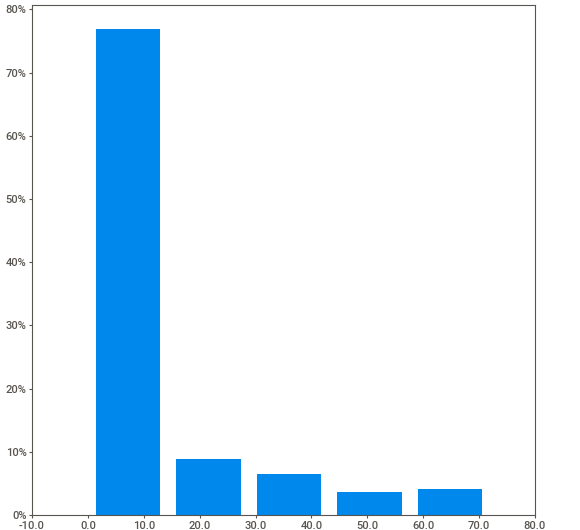
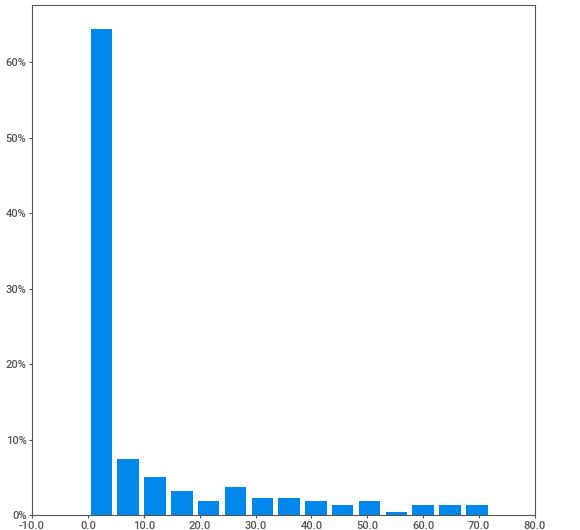
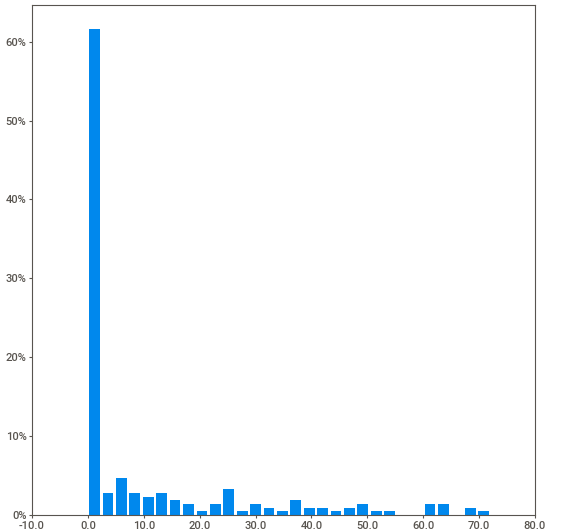
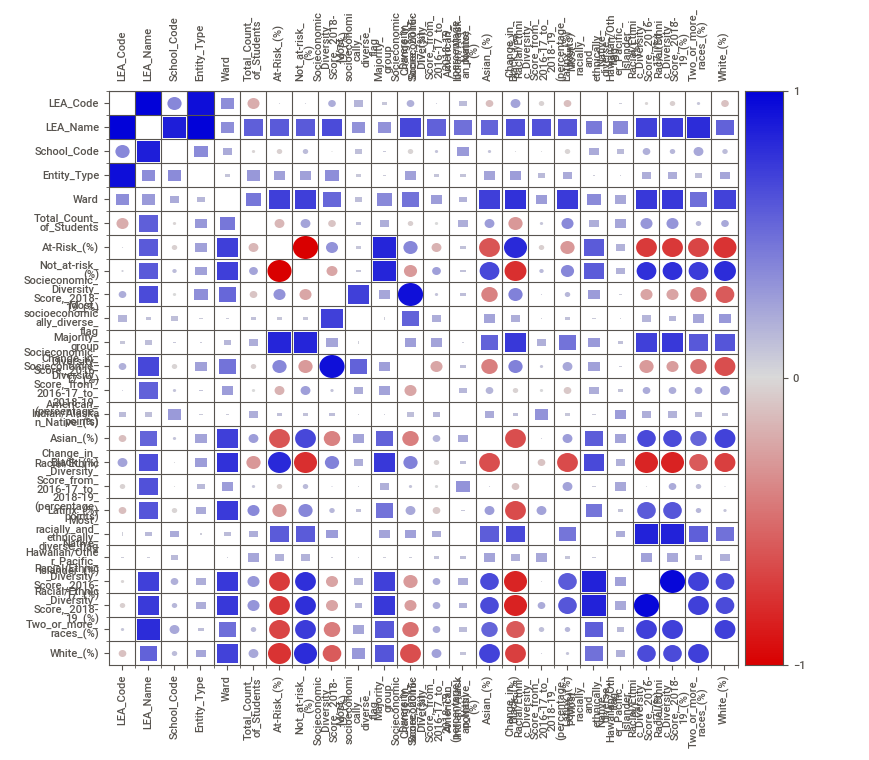
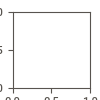

In [68]:
diversity_ana = sv.analyze(diversity_1819)
diversity_ana.show_notebook()

# analyze the financial